## STEP 0: Initialize packages and parameters

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install finnhub-python

In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import finnhub
finnhub_client = finnhub.Client(api_key="<finnhub api key here>")
news_series = finnhub_client.company_news('HON',_from="2023-11-04", to="2023-11-05")
news_series

FinnhubAPIException: ignored

In [ ]:
"""
==================== start here ===========================================
"""

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
# import tensorflow as tf
# import keras

# from keras.utils import np_utils # from keras import utils as np_utils
# from keras.models import Sequential
# from keras.layers import Activation, Dense
# from sklearn.preprocessing import StandardScaler

# from sklearn.metrics import (roc_curve, auc, roc_auc_score,
#                              confusion_matrix, average_precision_score)

# import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")


import xgboost as xgb

from datetime import date, datetime, tzinfo, timedelta
import datetime

# from datetime import date
# from datetime import timedelta

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pypfopt
print(pypfopt.__version__)

from pypfopt import risk_models
from pypfopt import plotting

from pypfopt import EfficientFrontier

from pypfopt import risk_models
from pypfopt import plotting

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

from pypfopt import EfficientFrontier, objective_functions


1.5.5


In [ ]:
# import numpy as np
# import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def convert_date(x):

    func_date = datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d')

    return func_date


def convert_date_time(x):

    func_date_time = datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

    return func_date_time

#### Initialize parameters (e.g., number of days train/test, etc.)

In [ ]:
tickers_pull = ['XOM', 'HON', 'RTX', 'AMZN', 'PEP', 'UNH', 'JNJ', 'V', 'NVDA', 'AAPL', 'MSFT', 'GOOGL']
# ======= initial parameters ============

noofdays_test = 250
# ======= lag 30 days for live runs ============
noofdays_lag_live = 30


In [ ]:

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

## STEP 1 Data pull

In [ ]:
ohlc = yf.download(tickers_pull, period="60mo") # 60 months
prices = ohlc["Adj Close"]
# prices

[*********************100%%**********************]  12 of 12 completed


In [ ]:
market_prices_BL_raw = yf.download("SPY", period="60mo")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


## STEP 2 ML Models

In [ ]:
returns_full = prices.pct_change()
returns= returns_full.dropna()
# returns
# returns_full =  returns_full.reset_index()
df = returns
stock_list = tickers_pull

In [ ]:
train = df.head(df.shape[0]-noofdays_test)
test = df.tail(noofdays_test)
training_dates = df.head(df.shape[0]-noofdays_test).index.values
testing_dates = df.tail(noofdays_test).index.values

In [ ]:
# ----- ONE DAY PREDICTION:: PERFORMANCE METRICS ------------
training_prices_x = {}
training_prices_y = {}
testing_prices_x = {}
testing_prices_y = {}
training_dates_y = []
testing_dates_y = []
for col in train.columns:
    company_train = train[col].to_numpy()
    company_test = test[col].to_numpy()
    # Training input values are segments of prices 15 days long
    company_x = [company_train[i:i+15] for i in range(len(company_train)-15)]
    print(len(company_x))
    # Training output - stock price for the next day
    company_y = [company_train[i+1] for i in range(14,len(company_train)-1)]
    print(len(company_y))
    # Testing input x - segments of prices 15 days long
    company_test_x = [company_test[i:i+15] for i in range(len(company_test)-15)]
    company_test_y = [company_test[i+1] for i in range(14,len(company_test)-1)]
    print(len(company_test_x))
    print(len(company_test_y))
    training_prices_x[col] = company_x
    training_prices_y[col] = company_y
    testing_prices_x[col] = company_test_x
    testing_prices_y[col] = company_test_y
training_dates_y = [training_dates[i+1] for i in range(14,len(training_dates)-1)]
testing_dates_y = [testing_dates[i+1] for i in range(14,len(testing_dates)-1)]

992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235
992
992
235
235


In [ ]:
#LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import datetime

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Prepare sequences function
def prepare_sequences(X_data, y_data, sequence_length):
    X, y = [], []
    for i in range(len(X_data) - sequence_length):
        X.append(X_data[i:i + sequence_length])
        y.append(y_data[i + sequence_length])
    return np.array(X), np.array(y)

# Train improved LSTM model function
def train_improved_lstm_model(X, y, epochs=10, batch_size=32, dropout_rate=0.2):
    # Initialize scaler for the feature
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Reshape X for scaling (samples, timesteps) -> (samples * timesteps, features)
    nsamples, nx, ny = X.shape
    X_reshaped = X.reshape((nsamples * nx, ny))

    # Scale X and y
    X_scaled = scaler.fit_transform(X_reshaped).reshape(nsamples, nx, ny)
    y_scaled = scaler.fit_transform(y.reshape(-1, 1))

    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=(15, 1)),
        Dropout(dropout_rate),
        LSTM(100),
        Dropout(dropout_rate),
        Dense(1)
    ])

    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stopping = EarlyStopping(monitor='loss', patience=3)
    model.fit(X_scaled, y_scaled, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

    return model, scaler


# Training LSTM models
lstm_models = {}
for col in train.columns:
    # Convert X_train and y_train from lists to NumPy arrays
    X_train = np.array(training_prices_x[col])
    y_train = np.array(training_prices_y[col])

    # Reshape X_train to (samples, time steps, features)
    X_train = np.reshape(X_train, (X_train.shape[0], 15, 1))

    # Fit model
    lstm_model, scaler = train_improved_lstm_model(X_train, y_train)
    lstm_models[col] = (lstm_model, scaler)



8/8 [==============================] - 1s 3ms/step


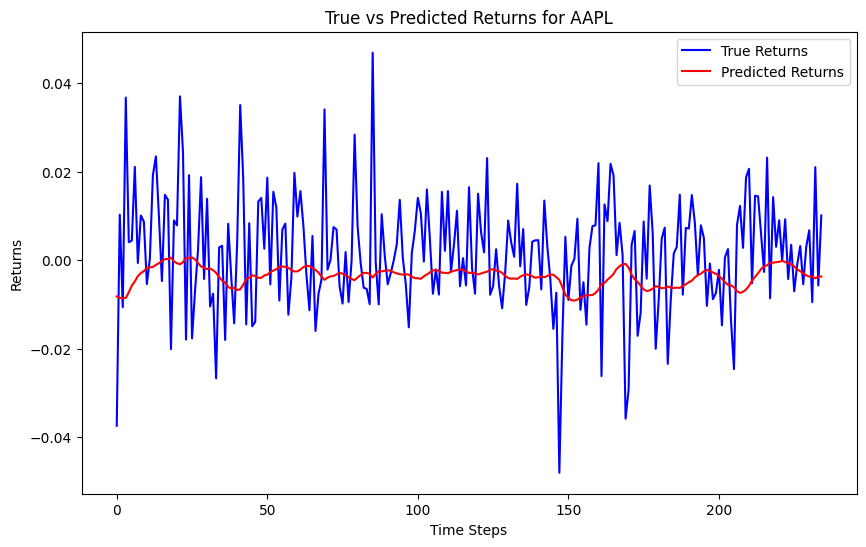

8/8 [==============================] - 2s 6ms/step


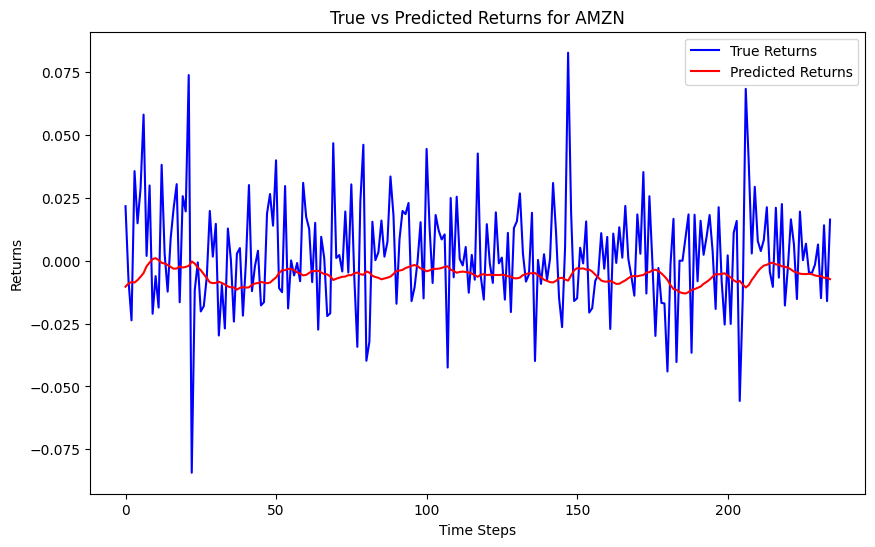

8/8 [==============================] - 1s 5ms/step


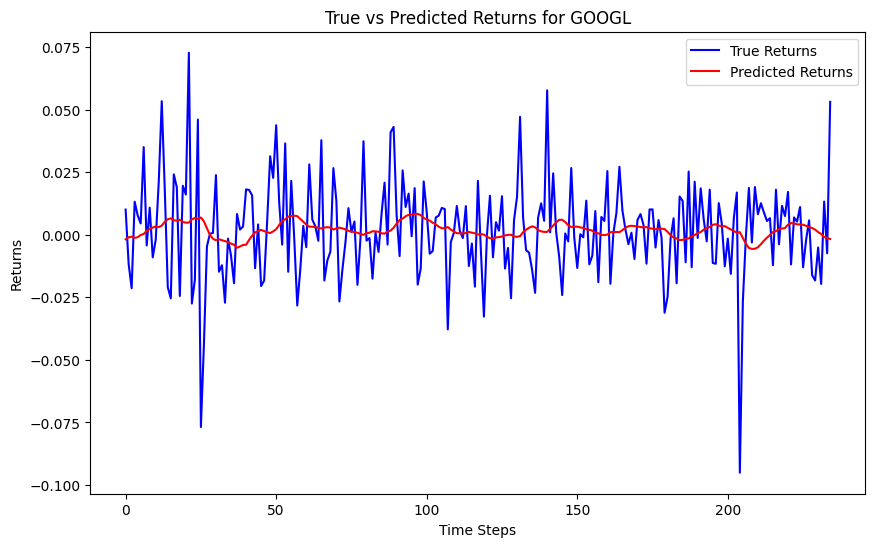

8/8 [==============================] - 1s 4ms/step


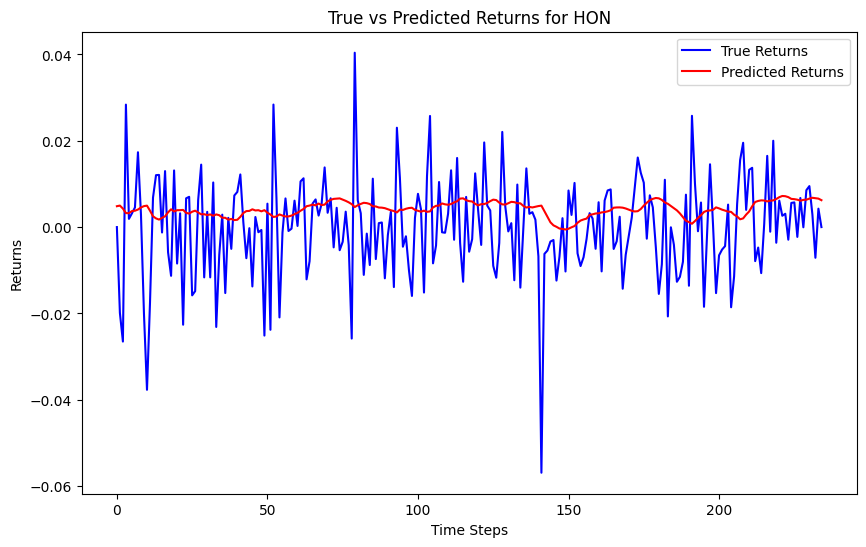

8/8 [==============================] - 1s 5ms/step


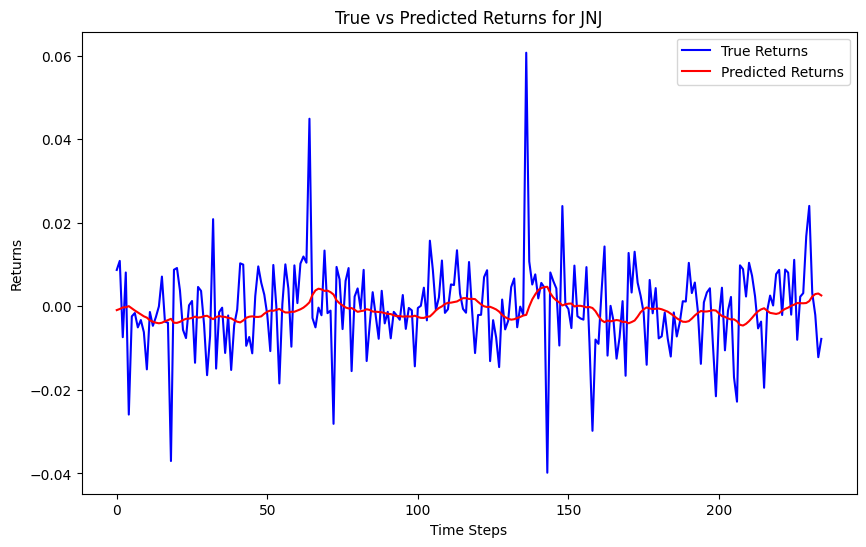

8/8 [==============================] - 1s 4ms/step


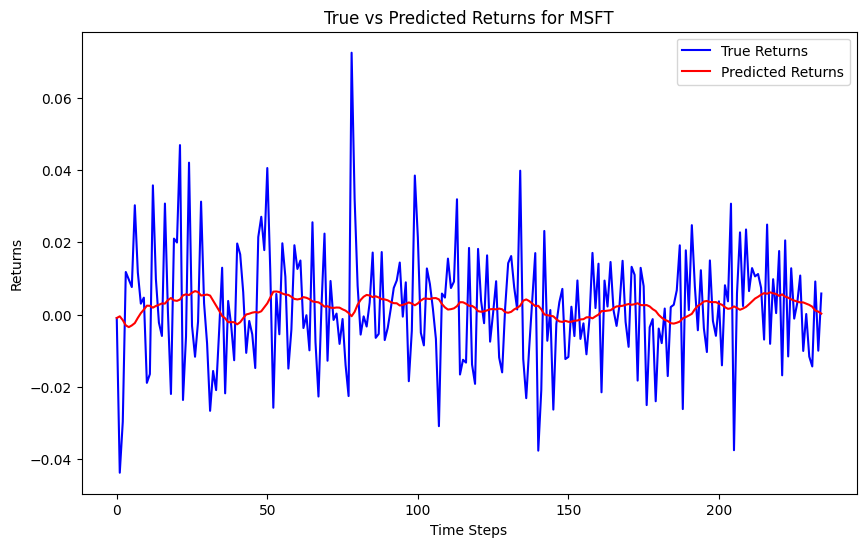

8/8 [==============================] - 1s 4ms/step


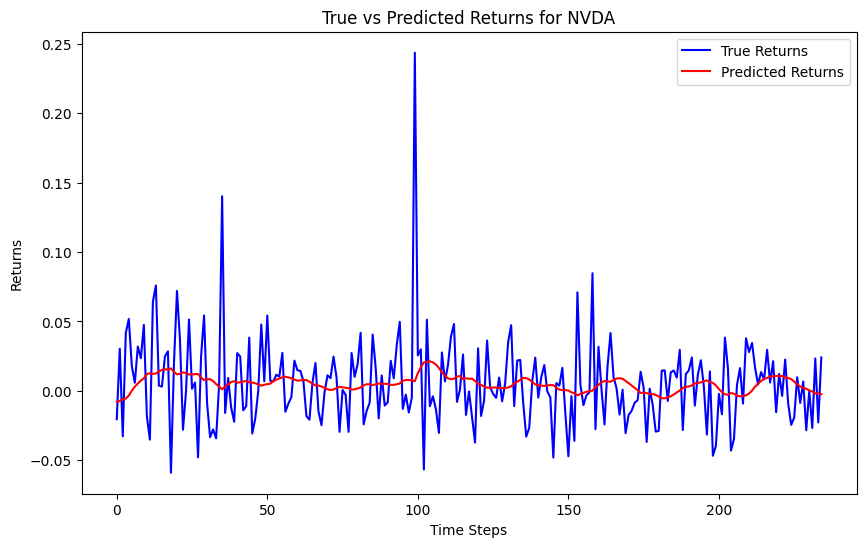

8/8 [==============================] - 1s 4ms/step


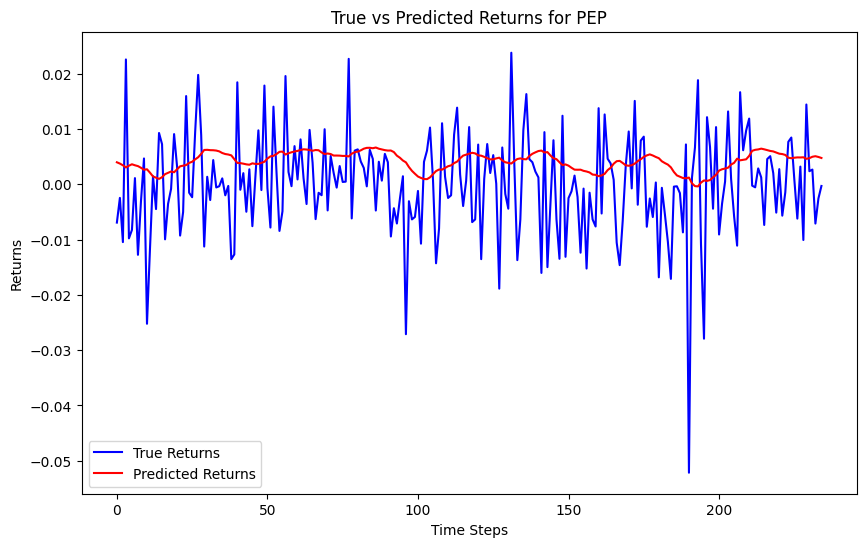

8/8 [==============================] - 1s 5ms/step


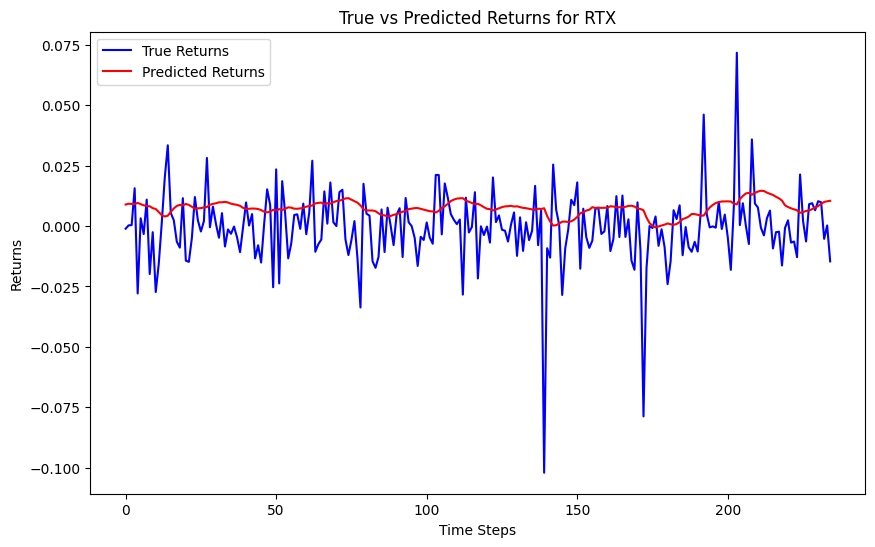

8/8 [==============================] - 1s 3ms/step


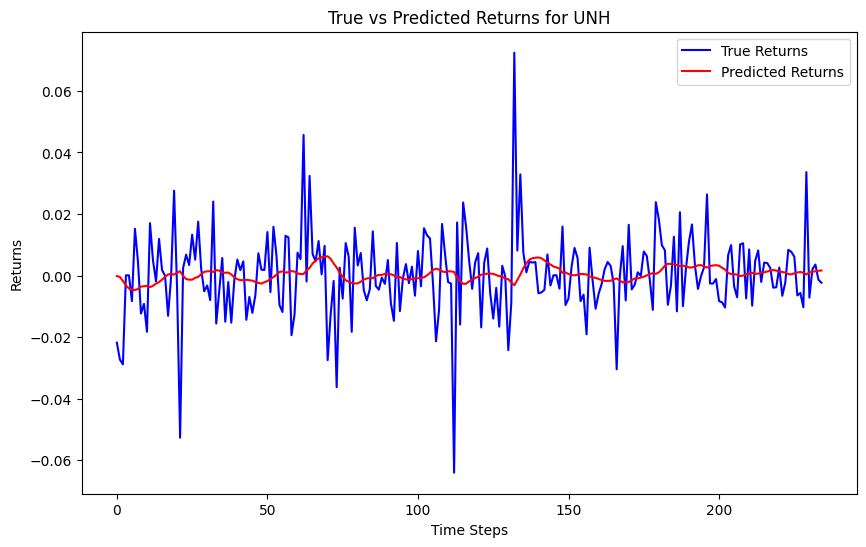

8/8 [==============================] - 1s 3ms/step


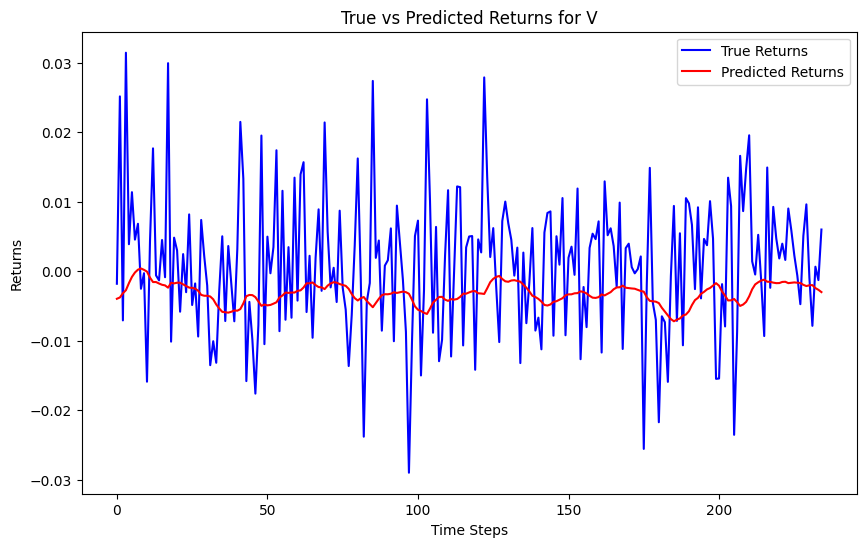

8/8 [==============================] - 1s 4ms/step


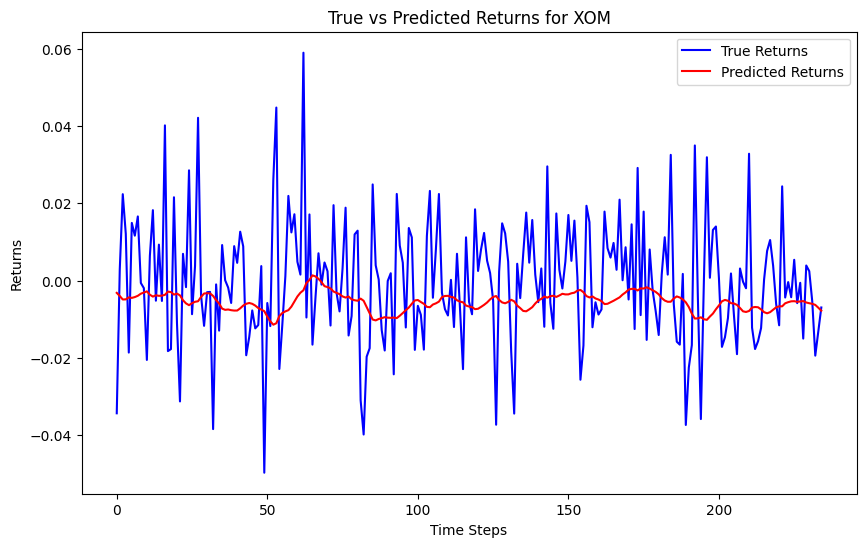

In [ ]:
# Predict and plot results for each stock
for col in test.columns:
    model, scaler = lstm_models[col]

    # Prepare test sequences
    X_test, _ = prepare_sequences(test[col].values, test[col].values, 15)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Reshape for LSTM

    # Scale the test data
    nsamples, nx, ny = X_test.shape
    X_test_reshaped = X_test.reshape((nsamples*nx, ny))
    X_test_scaled = scaler.transform(X_test_reshaped).reshape(nsamples, nx, ny)

    # Make predictions
    predicted = model.predict(X_test_scaled)
    predicted_returns = scaler.inverse_transform(predicted).flatten()

    # Plotting
    plt.figure(figsize=(10, 6))
    actual = test[col].values[15:]  # Aligning the length of actual returns with predictions
    plt.plot(actual, label='True Returns', color='blue')
    plt.plot(predicted_returns, label='Predicted Returns', color='red')
    plt.title(f'True vs Predicted Returns for {col}')
    plt.xlabel('Time Steps')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

In [ ]:
predicted_prices = {}

# Generate predictions for each stock
for col in test.columns:
    model, scaler = lstm_models[col]

    # Prepare test sequences
    X_test, _ = prepare_sequences(test[col].values, test[col].values, 15)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape for LSTM

    # Scale the test data
    nsamples, nx, ny = X_test.shape
    X_test_reshaped = X_test.reshape((nsamples * nx, ny))
    X_test_scaled = scaler.transform(X_test_reshaped).reshape(nsamples, nx, ny)

    # Make predictions
    predicted = model.predict(X_test_scaled)
    predicted_prices[col] = scaler.inverse_transform(predicted).flatten()

8/8 [==============================] - 0s 3ms/step


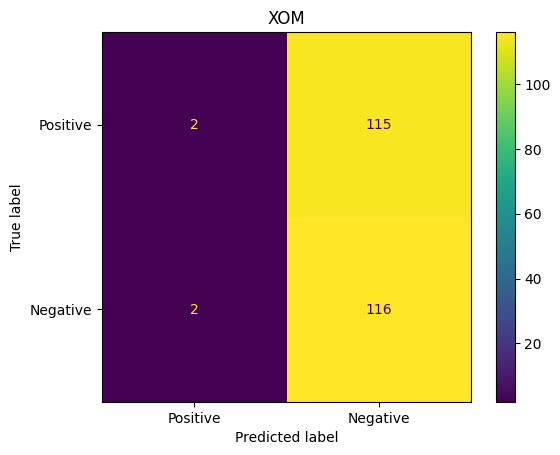

root mean squared error XOM: 0.017163797036559715
accuracy rate XOM: 0.502127659574468


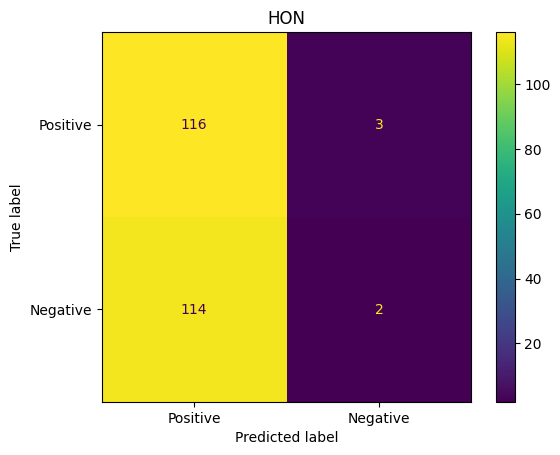

root mean squared error HON: 0.012555738426850429
accuracy rate HON: 0.502127659574468


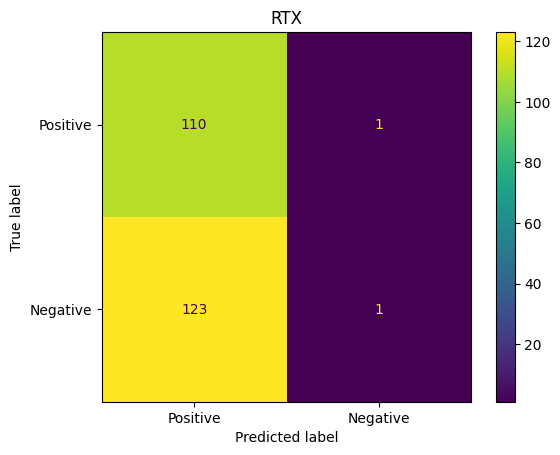

root mean squared error RTX: 0.017331009666840466
accuracy rate RTX: 0.4723404255319149


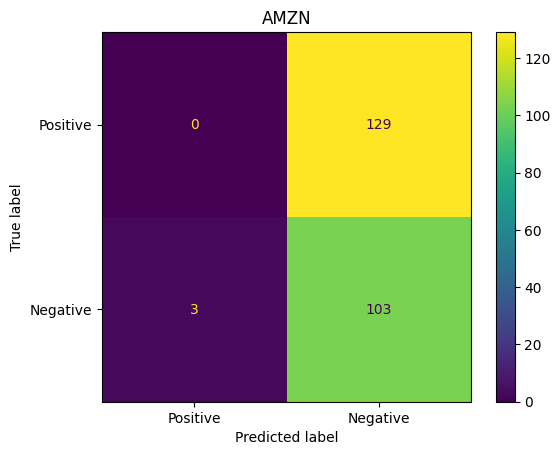

root mean squared error AMZN: 0.023208900291245643
accuracy rate AMZN: 0.43829787234042555


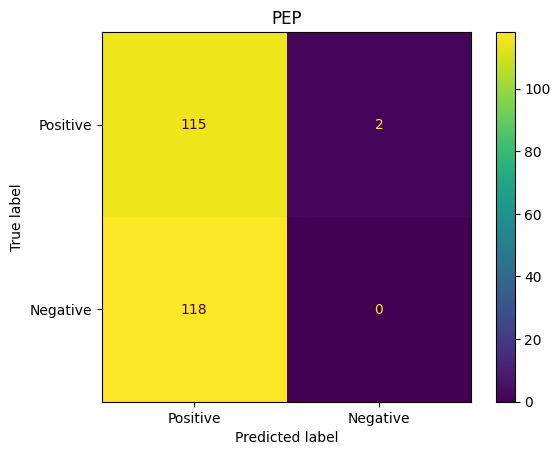

root mean squared error PEP: 0.010317277464682813
accuracy rate PEP: 0.48936170212765956


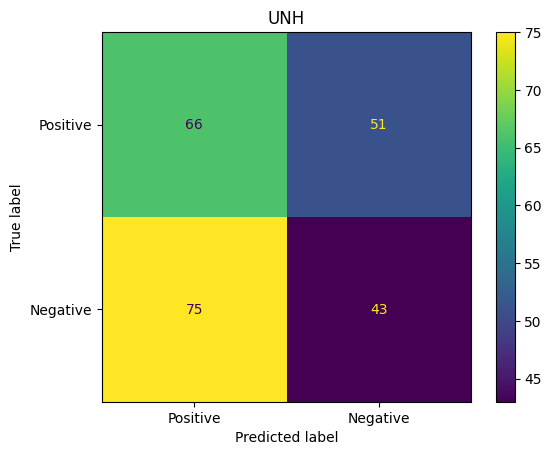

root mean squared error UNH: 0.013868658401685911
accuracy rate UNH: 0.46382978723404256


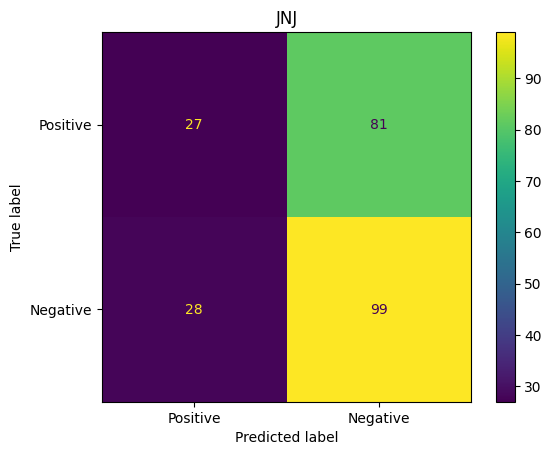

root mean squared error JNJ: 0.010758834544912471
accuracy rate JNJ: 0.5361702127659574


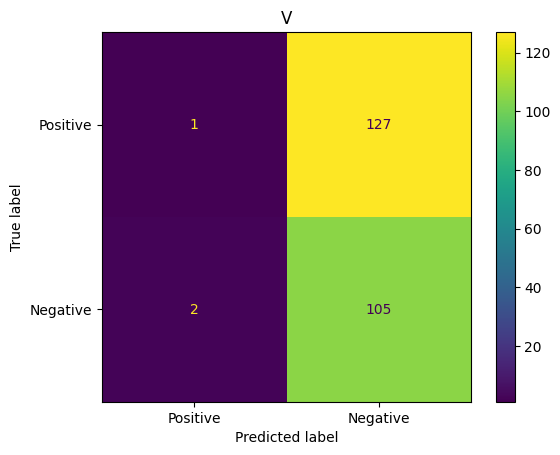

root mean squared error V: 0.010889602240394496
accuracy rate V: 0.451063829787234


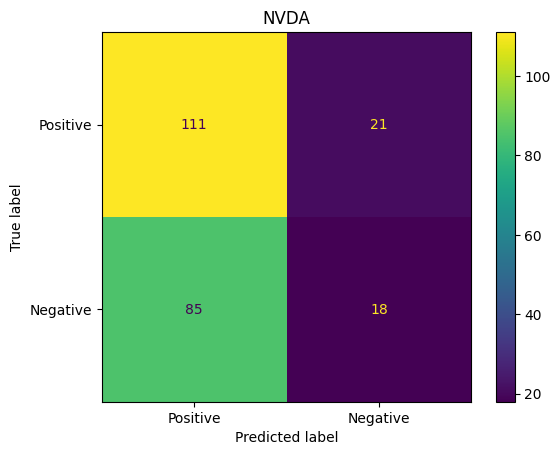

root mean squared error NVDA: 0.031721672028375385
accuracy rate NVDA: 0.548936170212766


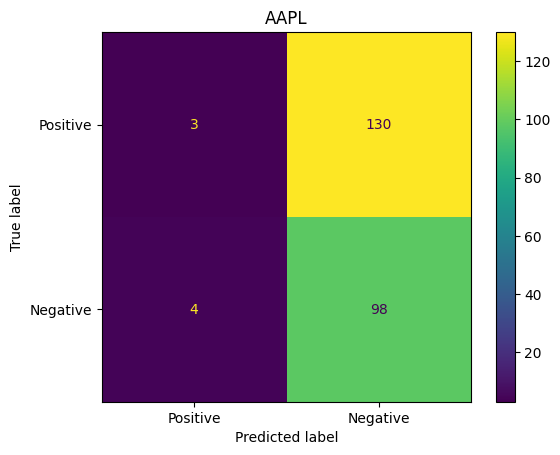

root mean squared error AAPL: 0.014239136728275955
accuracy rate AAPL: 0.4297872340425532


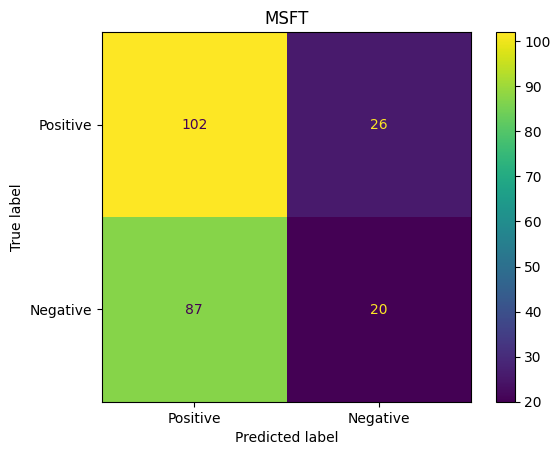

root mean squared error MSFT: 0.01636171896342548
accuracy rate MSFT: 0.5191489361702127


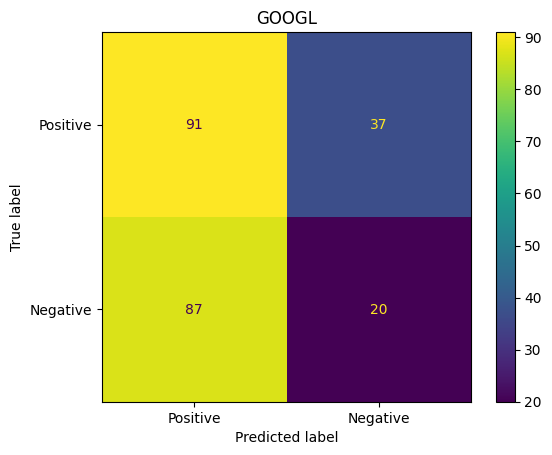

root mean squared error GOOGL: 0.01994471563437689
accuracy rate GOOGL: 0.4723404255319149


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'predicted_prices' contains the LSTM model predictions for each stock
model_preds = predicted_prices

true_classes = {}
pred_classes = {}
for col in train.columns:
    true = testing_prices_y[col]
    pred = model_preds[col]
    true_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", true))
    pred_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", pred))

class_labels = ['Positive', 'Negative']

for stock1 in tickers_pull:
    cm1 = confusion_matrix(true_classes[stock1], pred_classes[stock1], labels=class_labels)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)
    disp1.plot()
    plt.title(stock1)
    plt.show()
    accuracy_score_1 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=False)
    accuracy_score_2 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=True)
    rmse = mean_squared_error(testing_prices_y[stock1], model_preds[stock1], squared=False)
    print(f"root mean squared error {stock1}: {rmse}")
    print(f"accuracy rate {stock1}: {accuracy_score_2}")


In [ ]:
true_classes = {}
pred_classes = {}
for col in train.columns:
    true = testing_prices_y[col]
    pred = model_preds[col]
    true_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", true))
    pred_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", pred))

In [ ]:
class_labels=['Positive', 'Negative']

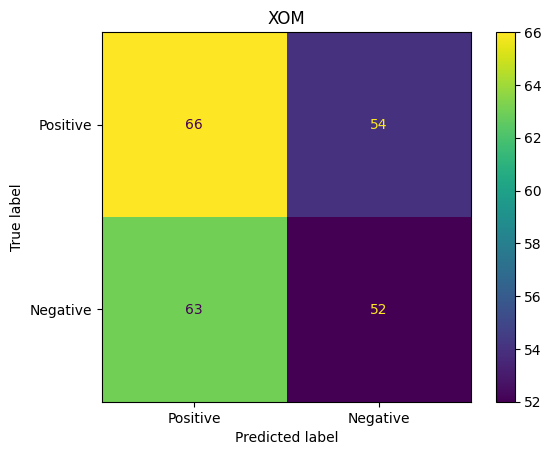

root mean squared error XOM:  0.02383737034739884
accuracy rate XOM:  0.502127659574468


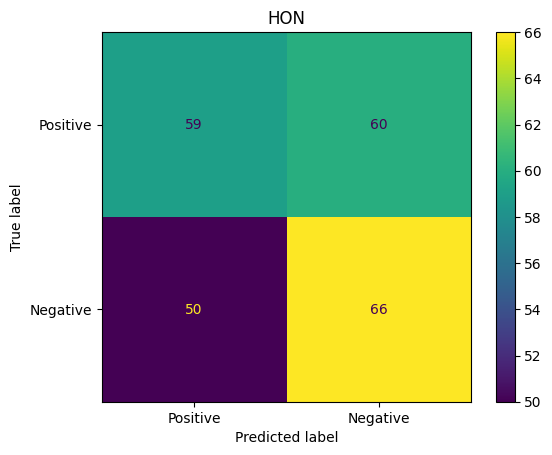

root mean squared error HON:  0.020288562492609335
accuracy rate HON:  0.5319148936170213


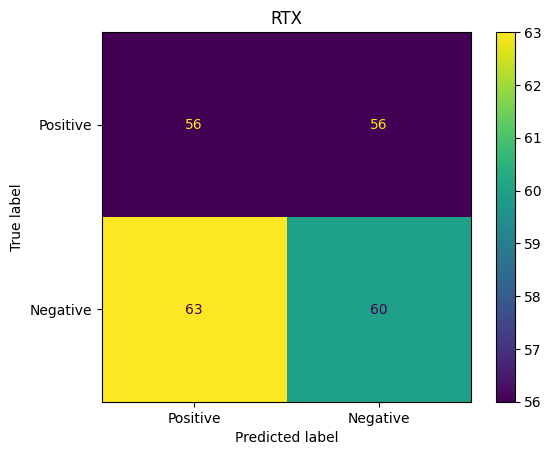

root mean squared error RTX:  0.02535463771140705
accuracy rate RTX:  0.49361702127659574


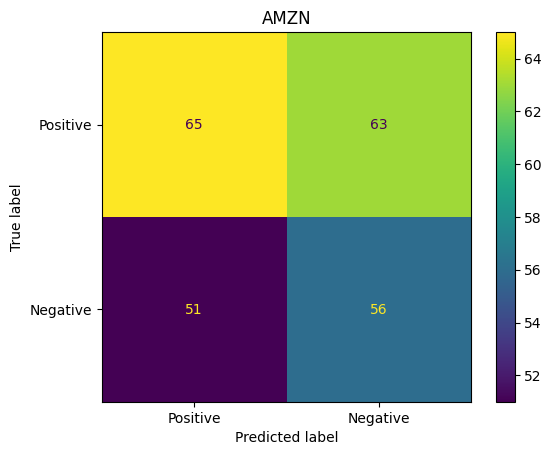

root mean squared error AMZN:  0.029846653716401914
accuracy rate AMZN:  0.5148936170212766


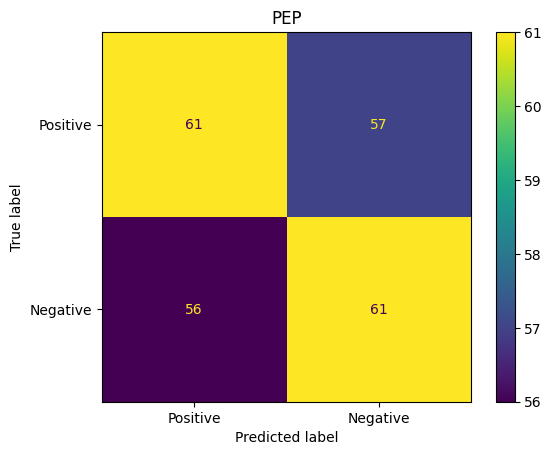

root mean squared error PEP:  0.014775880992591436
accuracy rate PEP:  0.5191489361702127


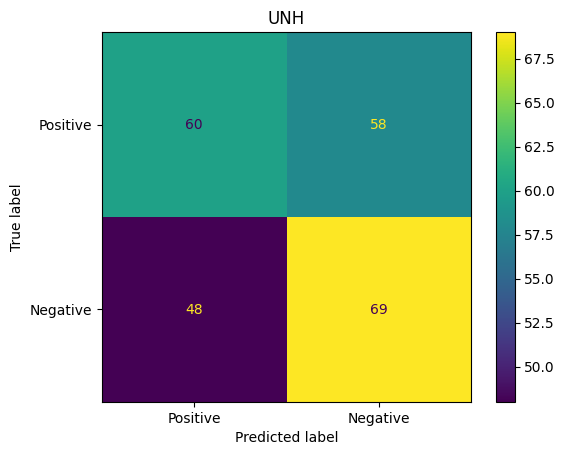

root mean squared error UNH:  0.02096662638710555
accuracy rate UNH:  0.548936170212766


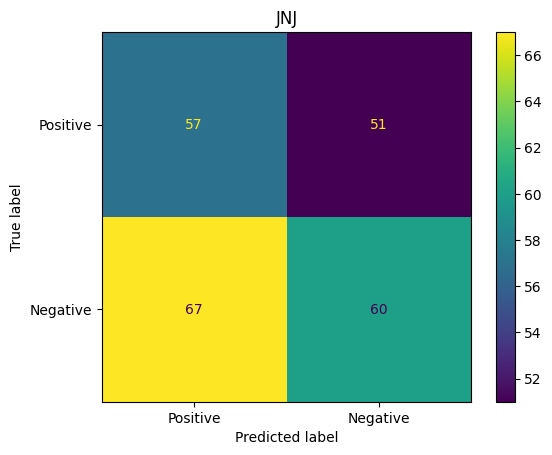

root mean squared error JNJ:  0.01541409420991993
accuracy rate JNJ:  0.4978723404255319


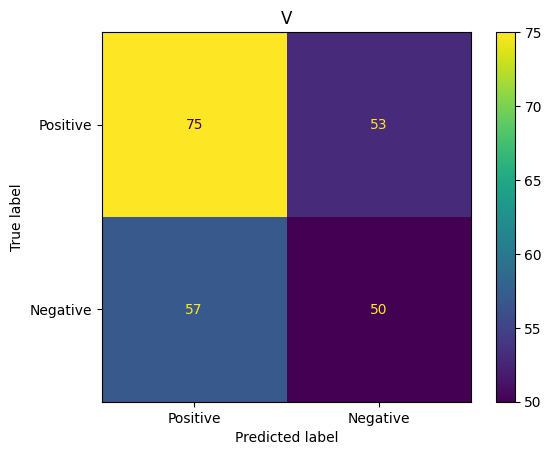

root mean squared error V:  0.018584933595638772
accuracy rate V:  0.5319148936170213


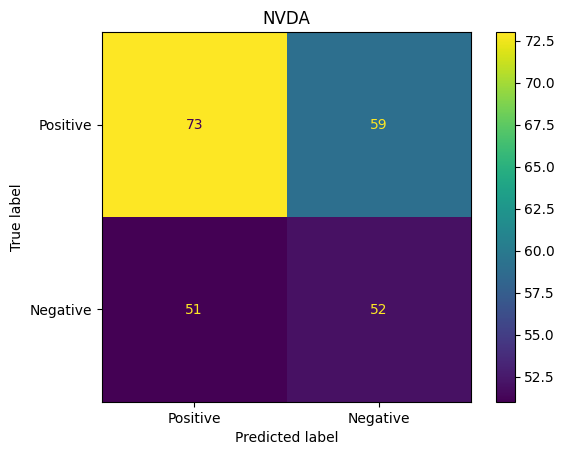

root mean squared error NVDA:  0.044465125800322934
accuracy rate NVDA:  0.5319148936170213


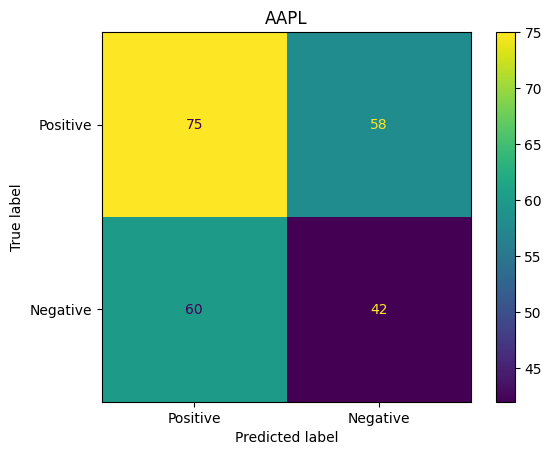

root mean squared error AAPL:  0.025785776547905318
accuracy rate AAPL:  0.4978723404255319


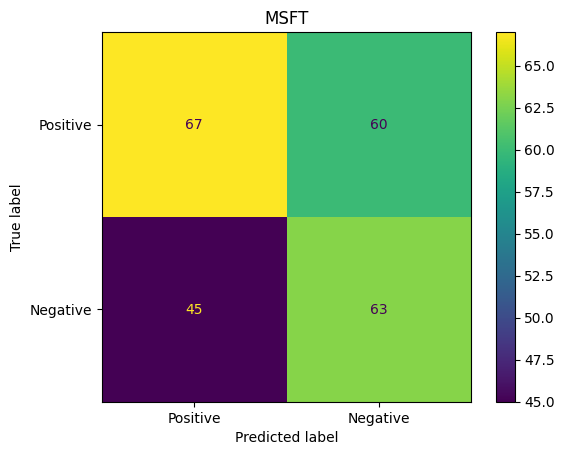

root mean squared error MSFT:  0.02335566760630847
accuracy rate MSFT:  0.5531914893617021


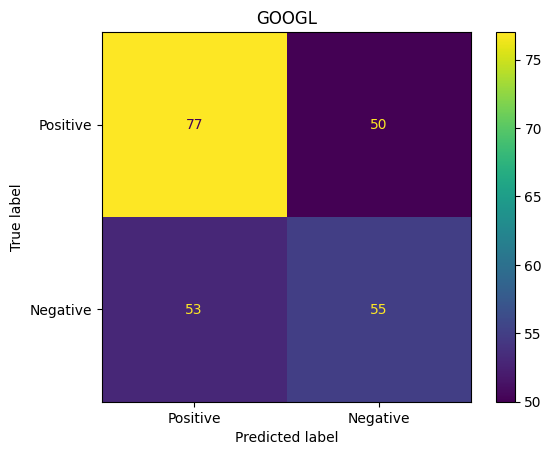

root mean squared error GOOGL:  0.026678368263850023
accuracy rate GOOGL:  0.5617021276595745


In [ ]:
for stock1 in tickers_pull:
    cm1 = confusion_matrix(true_classes[stock1], pred_classes[stock1], labels=class_labels)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)
    disp1.plot()
    plt.title(stock1)
    plt.show()
    accuracy_score_1 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=False)
    accuracy_score_2 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=True)
    rmse = mean_squared_error(testing_prices_y[stock1], model_preds[stock1], squared=False)
    print("root mean squared error "+stock1+":  "+str(rmse))
    print("accuracy rate "+stock1+":  "+str(accuracy_score_2))

In [ ]:
#Random Forest
model_preds ={}
for col in train.columns:
    bst = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=0)
    bst = bst.fit(training_prices_x[col],training_prices_y[col])
    model_preds[col] = bst.predict(testing_prices_x[col])

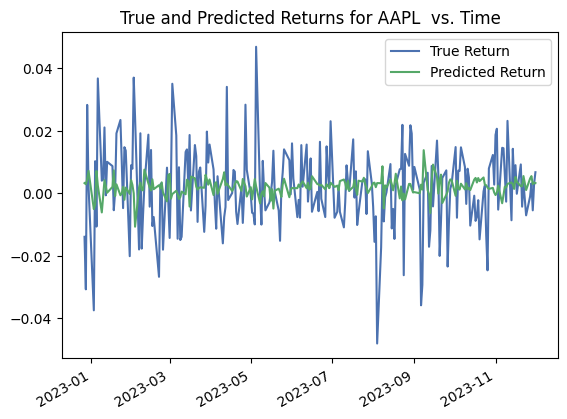

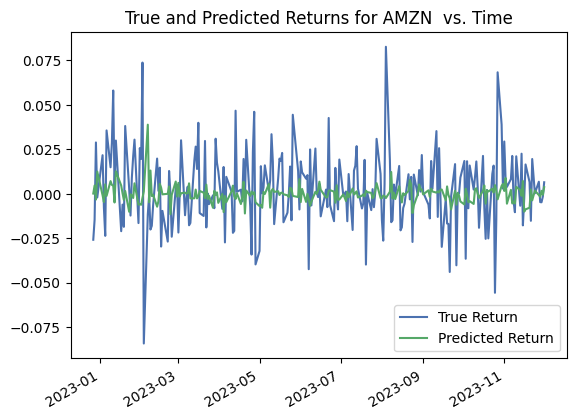

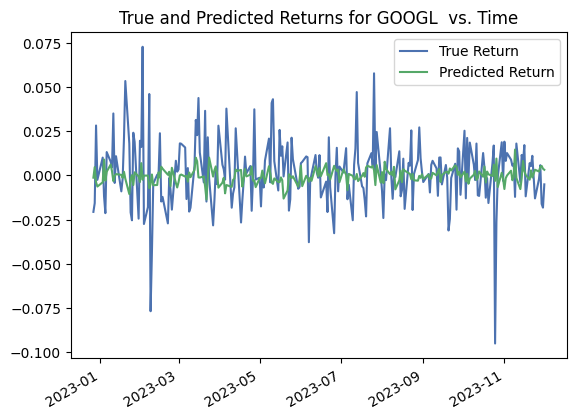

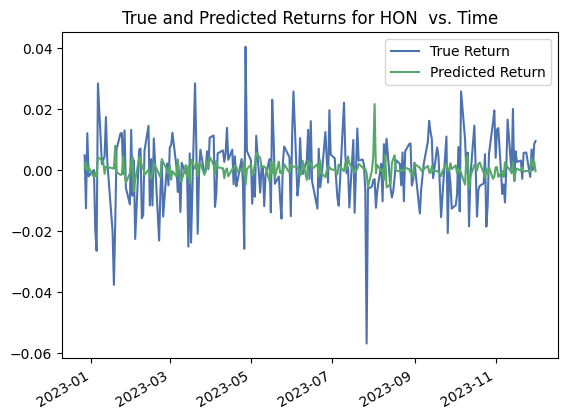

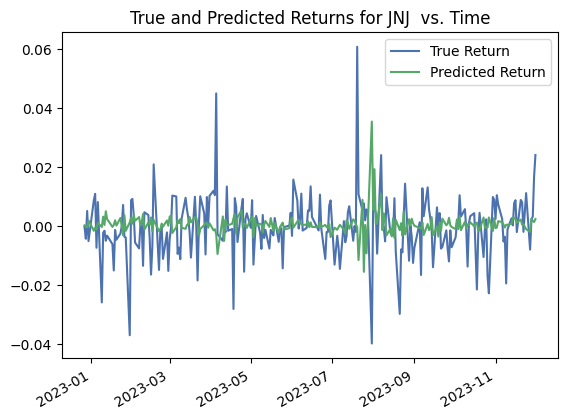

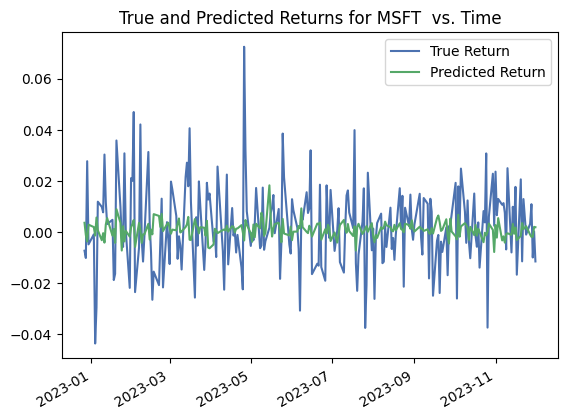

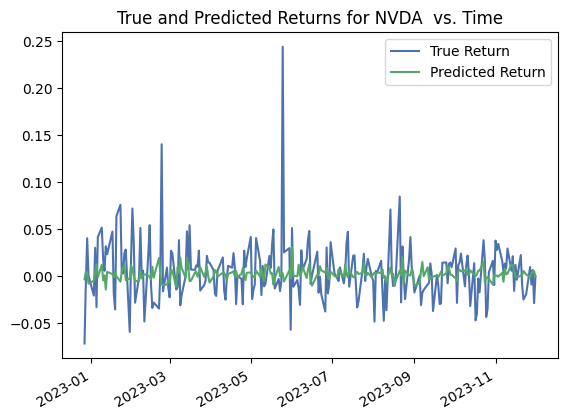

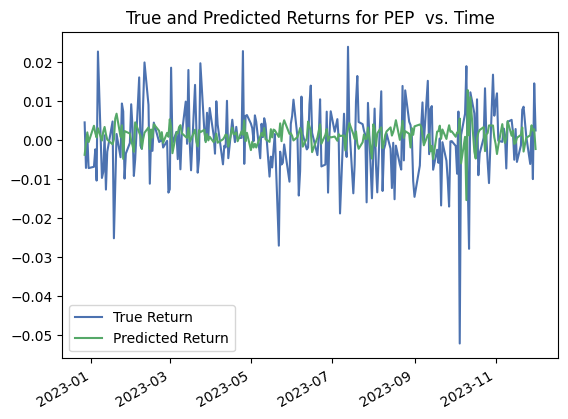

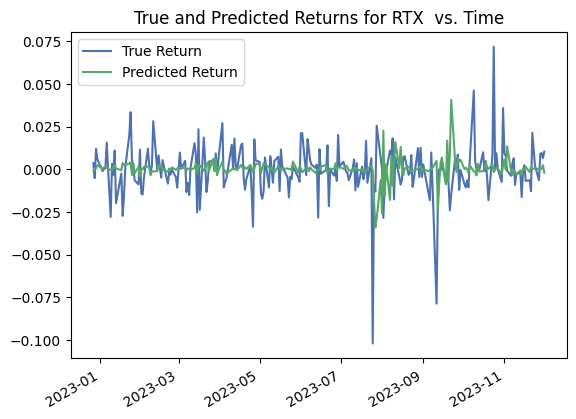

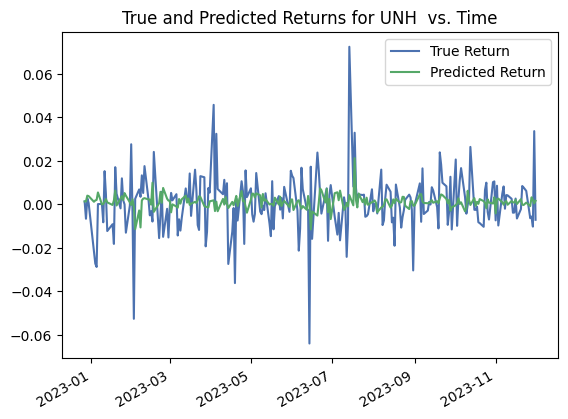

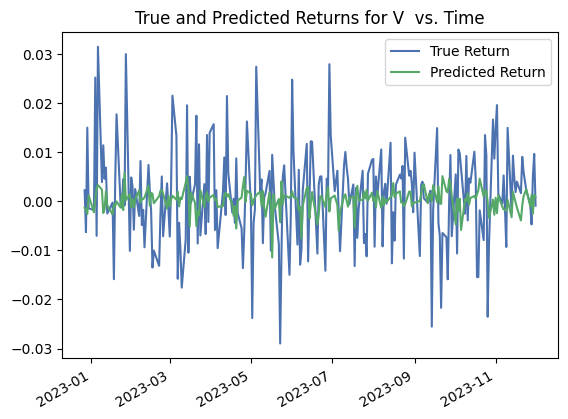

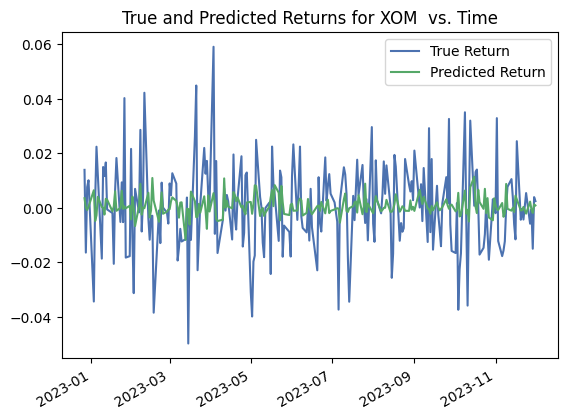

In [ ]:
for col in train.columns:
  preds_df = pd.DataFrame(list(zip(testing_prices_y[col], model_preds[col])),
                          columns =['True Return', 'Predicted Return'], index=testing_dates_y)
  preds_df.plot(title='True and Predicted Returns for ' + col + "  vs. Time" )

In [ ]:
true_classes = {}
pred_classes = {}
for col in train.columns:
    true = testing_prices_y[col]
    pred = model_preds[col]
    true_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", true))
    pred_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", pred))

In [ ]:
class_labels=['Positive', 'Negative']

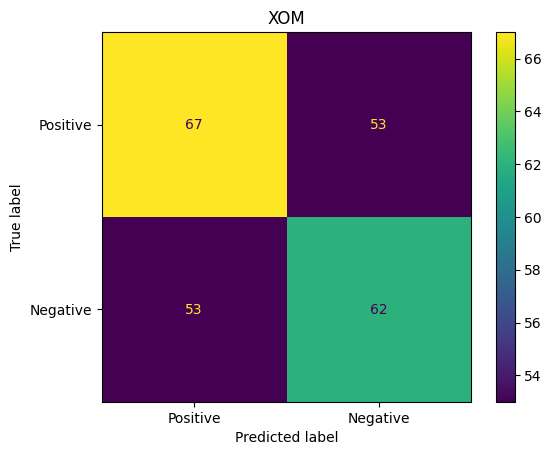

root mean squared error XOM:  0.01594488120594787
accuracy rate XOM:  0.548936170212766


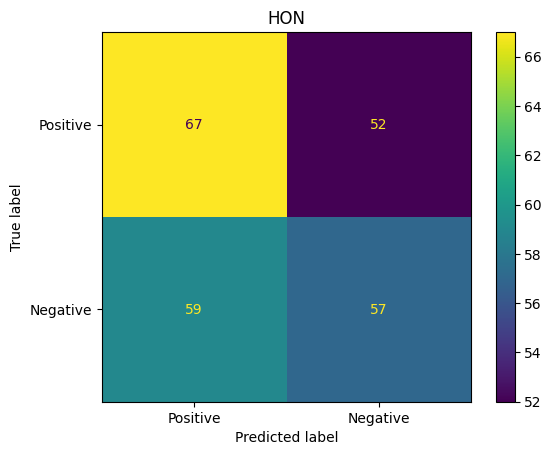

root mean squared error HON:  0.011953882626502111
accuracy rate HON:  0.5276595744680851


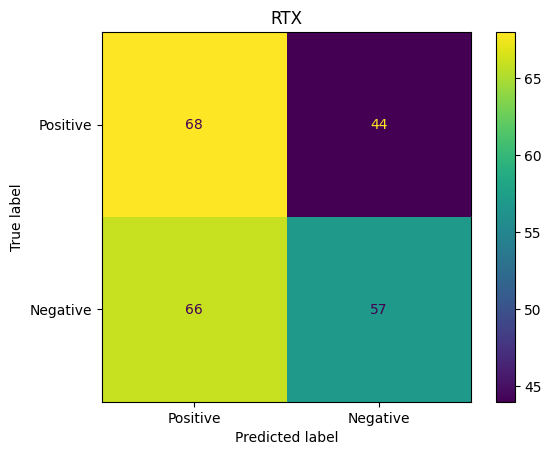

root mean squared error RTX:  0.016516795117852083
accuracy rate RTX:  0.5319148936170213


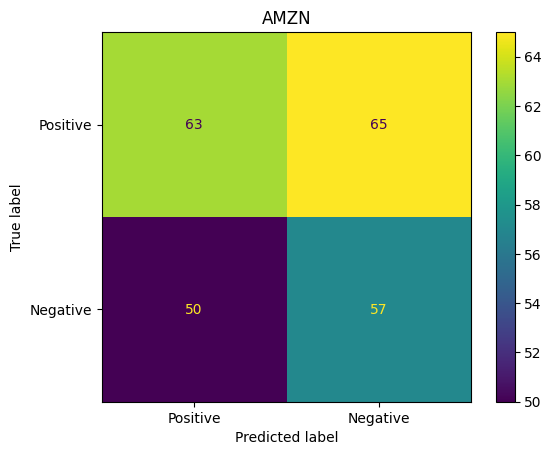

root mean squared error AMZN:  0.02224755516549525
accuracy rate AMZN:  0.5106382978723404


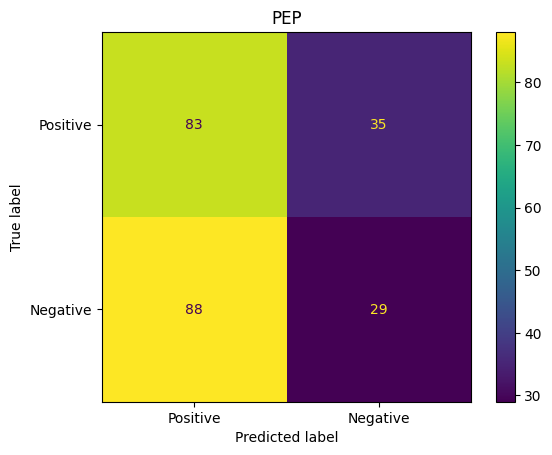

root mean squared error PEP:  0.009945439192099602
accuracy rate PEP:  0.4765957446808511


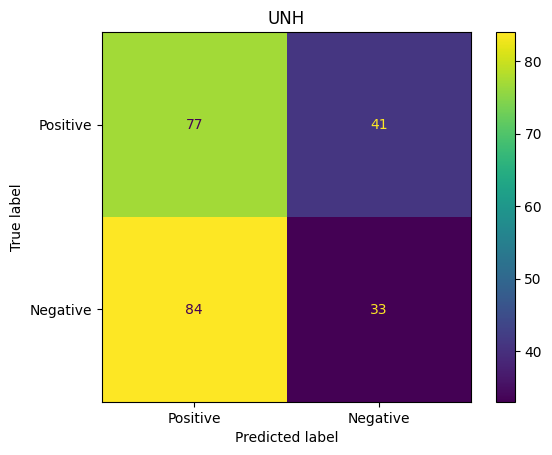

root mean squared error UNH:  0.01373350560675026
accuracy rate UNH:  0.46808510638297873


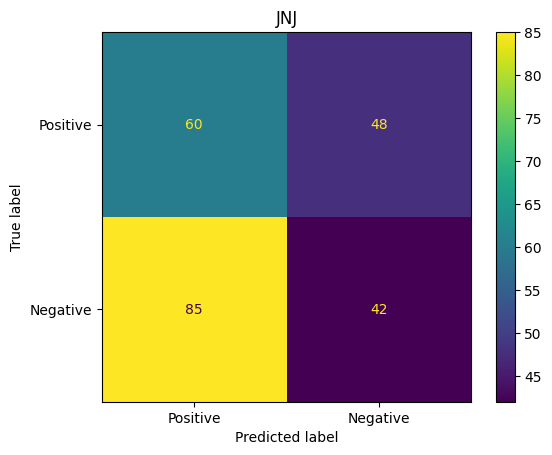

root mean squared error JNJ:  0.011776431086292413
accuracy rate JNJ:  0.4340425531914894


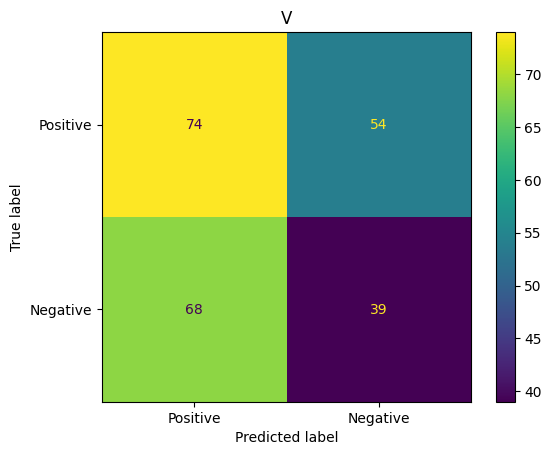

root mean squared error V:  0.010255580000922004
accuracy rate V:  0.4808510638297872


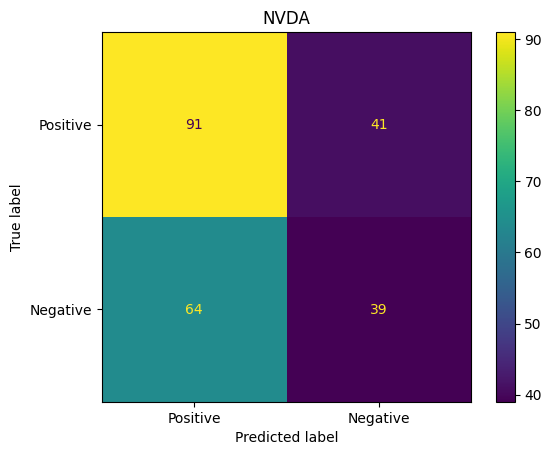

root mean squared error NVDA:  0.0318656862200792
accuracy rate NVDA:  0.5531914893617021


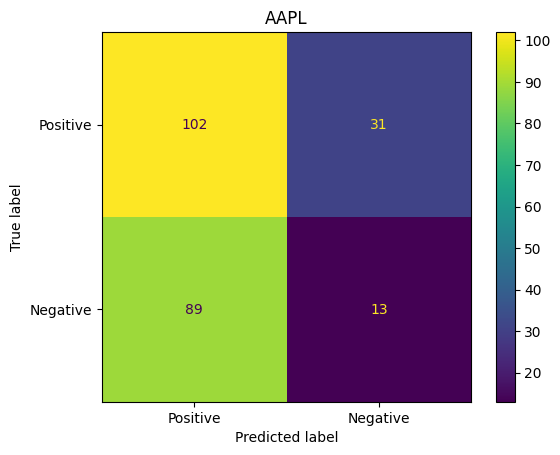

root mean squared error AAPL:  0.01378233541253827
accuracy rate AAPL:  0.48936170212765956


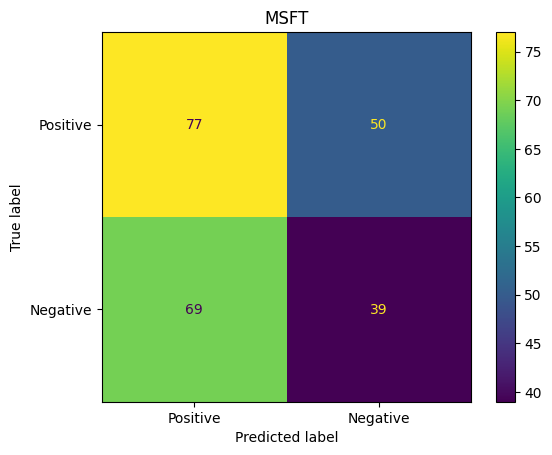

root mean squared error MSFT:  0.016432484619625428
accuracy rate MSFT:  0.49361702127659574


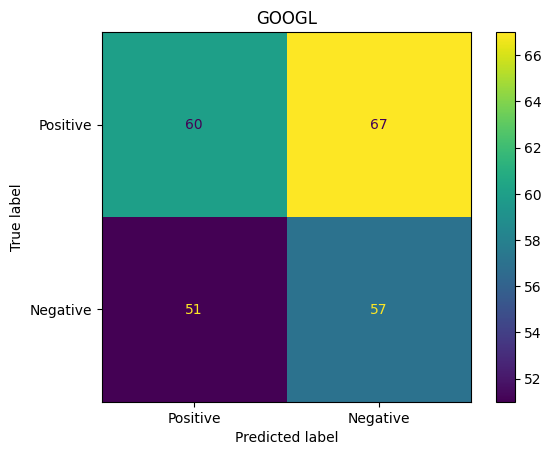

root mean squared error GOOGL:  0.020104607108295744
accuracy rate GOOGL:  0.4978723404255319


In [ ]:
for stock1 in tickers_pull:
    cm1 = confusion_matrix(true_classes[stock1], pred_classes[stock1], labels=class_labels)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)
    disp1.plot()
    plt.title(stock1)
    plt.show()
    accuracy_score_1 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=False)
    accuracy_score_2 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=True)
    rmse = mean_squared_error(testing_prices_y[stock1], model_preds[stock1], squared=False)
    print("root mean squared error "+stock1+":  "+str(rmse))
    print("accuracy rate "+stock1+":  "+str(accuracy_score_2))

In [ ]:
# ----- ONE DAY PREDICTION:: LIVE  ------------
# training_prices_x = {}
# training_prices_y = {}
live_prices_x = {}
live_prices_y = {}
live_pred_x = {}
pred_live_30 = df.tail(noofdays_lag_live)

# live_pred_x = {}



for col in train.columns:

    company_live = df[col].to_numpy()
    company_live_30 = pred_live_30[col].to_numpy()
    company_live_x = [company_live[i:i+15] for i in range(len(company_live)-15)]
    company_live_y = [company_live[i+1] for i in range(14,len(company_live)-1)]


    # company_live_pred_x = [company_live[i:i+30+1] for i in range(len(company_live)-30+1)]
    company_live_pred_x= [company_live_30[i:i+15] for i in range(len(company_test)-15)]
    live_prices_x[col] = company_live_x
    live_prices_y[col] = company_live_y

    live_pred_x[col] = [company_live_pred_x[0]]

# live_pred_x

In [ ]:
# ----- ONE DAY PREDICTION LIVE ------------
next_day_preds ={}
for col in train.columns:
   st = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=0)
   bst = bst.fit(training_prices_x[col],training_prices_y[col])
   model_preds[col] = bst.predict(testing_prices_x[col])
   bst = bst.fit(live_prices_x[col],live_prices_y[col])
   next_day_preds[col] = bst.predict(live_pred_x[col])
next_day_preds

{'AAPL': array([0.00620649]),
 'AMZN': array([0.0142835]),
 'GOOGL': array([0.00971564]),
 'HON': array([0.00459684]),
 'JNJ': array([0.00018817]),
 'MSFT': array([0.01321828]),
 'NVDA': array([0.01661342]),
 'PEP': array([0.0026579]),
 'RTX': array([-0.00031098]),
 'UNH': array([0.00035167]),
 'V': array([0.00261697]),
 'XOM': array([-0.00090978])}

In [ ]:
next_day_preds_df = pd.DataFrame.from_dict(next_day_preds)
next_day_preds_df.index = ['pred']*1
next_day_preds_df

AAPL      AMZN     GOOGL       HON       JNJ      MSFT      NVDA  \
pred  0.006206  0.014283  0.009716  0.004597  0.000188  0.013218  0.016613   

           PEP       RTX       UNH         V      XOM  
pred  0.002658 -0.000311  0.000352  0.002617 -0.00091

In [ ]:
# ----- XGBoost Parameters ------------
xg_max_depth=50
xg_learning_rate=0.8
xg_reg_lambda=8
xg_subsample=0.4
xg_grow_policy="lossguide"

In [ ]:
model_preds ={}
for col in train.columns:
    bst = xgb.XGBRegressor(max_depth=xg_max_depth, learning_rate=xg_learning_rate,
                           reg_lambda=xg_reg_lambda, subsample=xg_subsample, grow_policy=xg_grow_policy)
    bst = bst.fit(training_prices_x[col],training_prices_y[col])
    model_preds[col] = bst.predict(testing_prices_x[col])

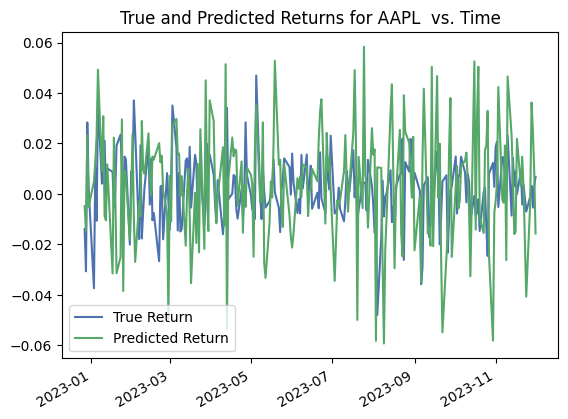

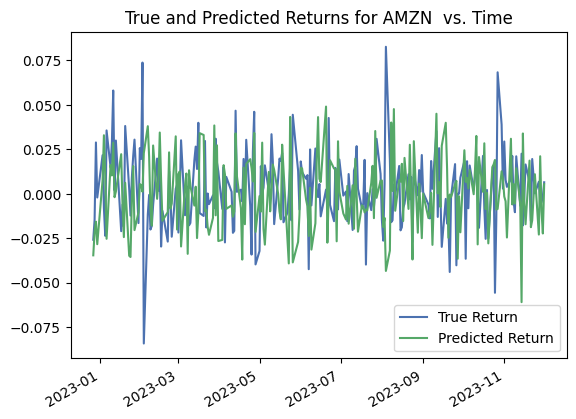

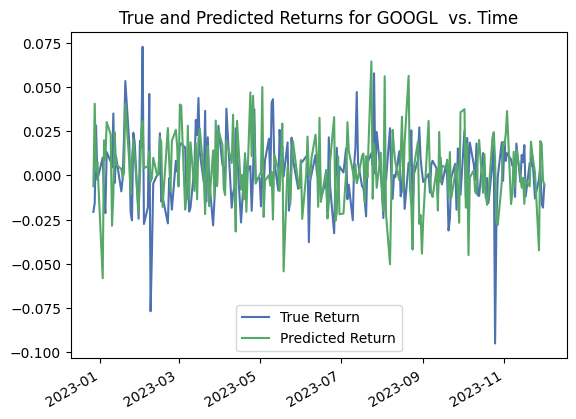

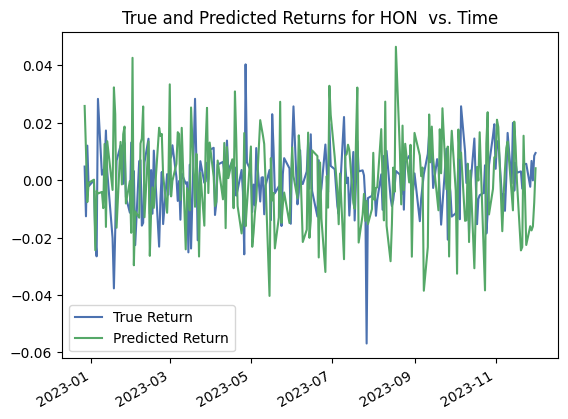

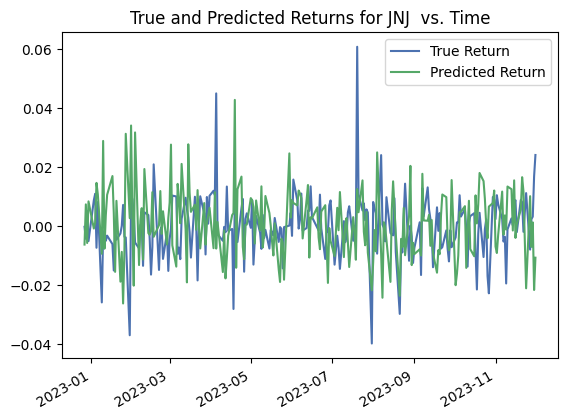

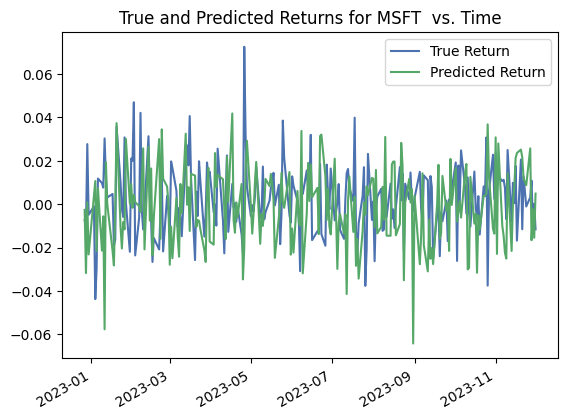

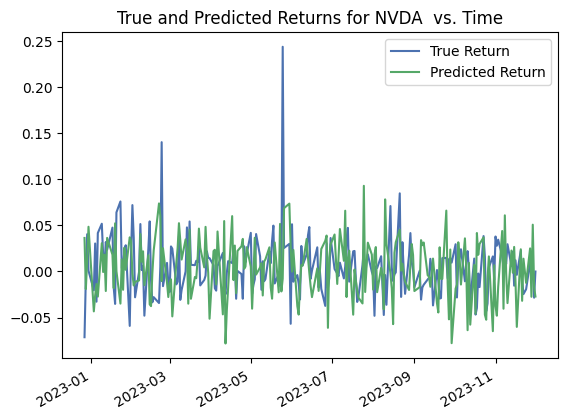

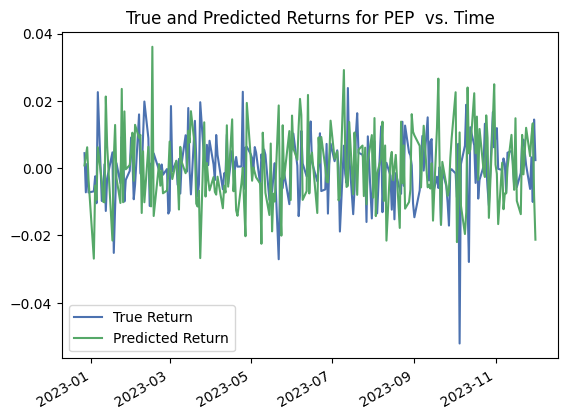

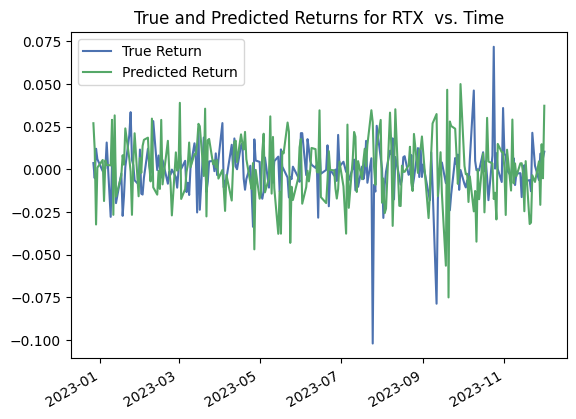

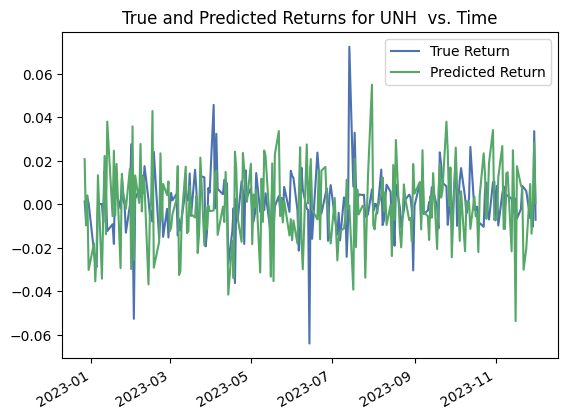

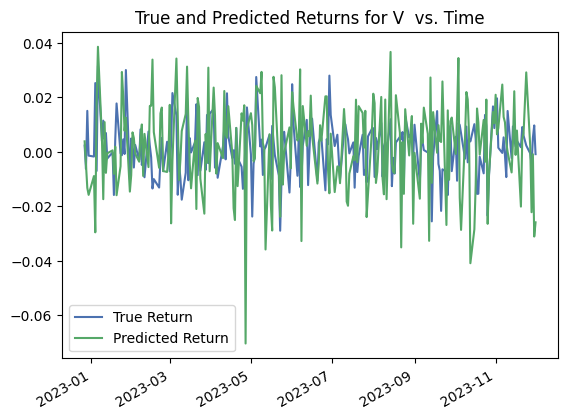

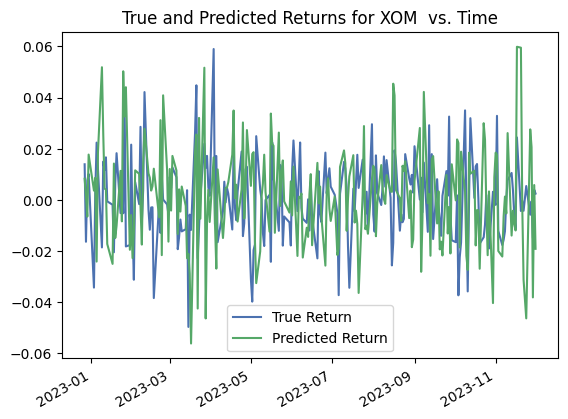

In [ ]:
for col in train.columns:
  preds_df = pd.DataFrame(list(zip(testing_prices_y[col], model_preds[col])),
                          columns =['True Return', 'Predicted Return'], index=testing_dates_y)
  preds_df.plot(title='True and Predicted Returns for ' + col + "  vs. Time" )

In [ ]:
true_classes = {}
pred_classes = {}
for col in train.columns:
    true = testing_prices_y[col]
    pred = model_preds[col]
    true_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", true))
    pred_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", pred))

In [ ]:
class_labels=['Positive', 'Negative']

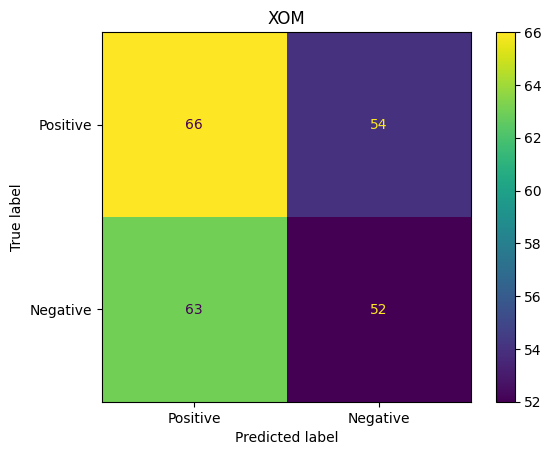

root mean squared error XOM:  0.02383737114887853
accuracy rate XOM:  0.502127659574468


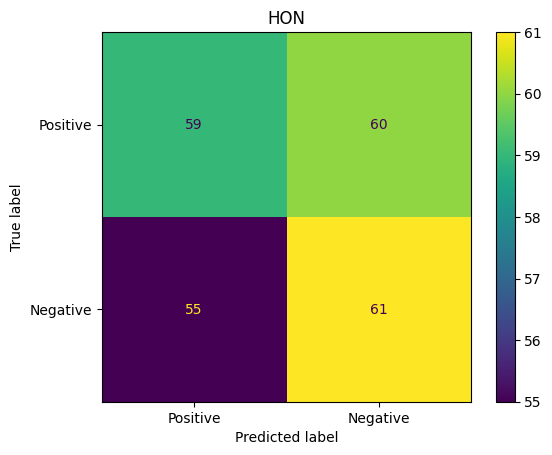

root mean squared error HON:  0.02024297807013419
accuracy rate HON:  0.5106382978723404


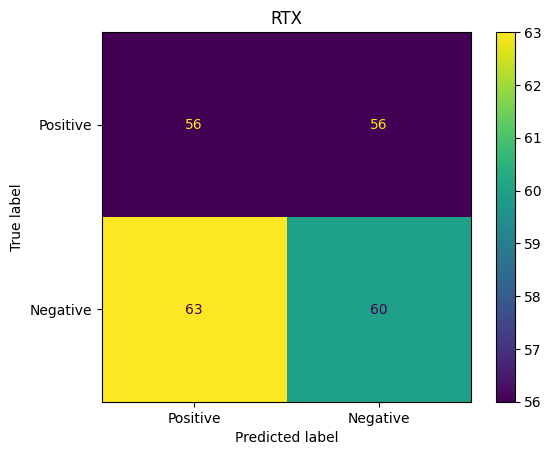

root mean squared error RTX:  0.025354636322884264
accuracy rate RTX:  0.49361702127659574


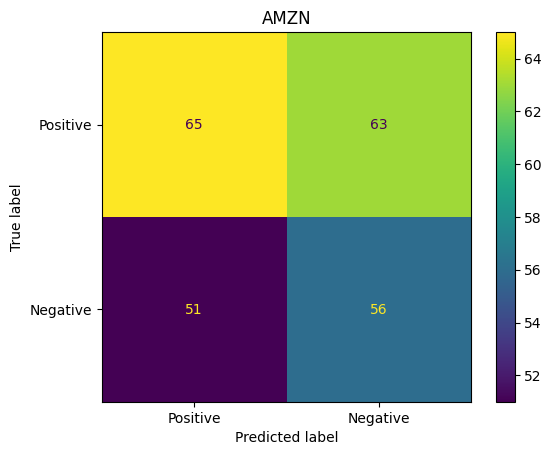

root mean squared error AMZN:  0.029846653716401914
accuracy rate AMZN:  0.5148936170212766


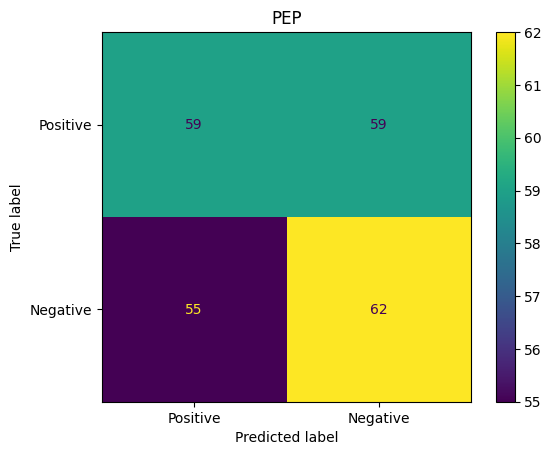

root mean squared error PEP:  0.014675722488248189
accuracy rate PEP:  0.5148936170212766


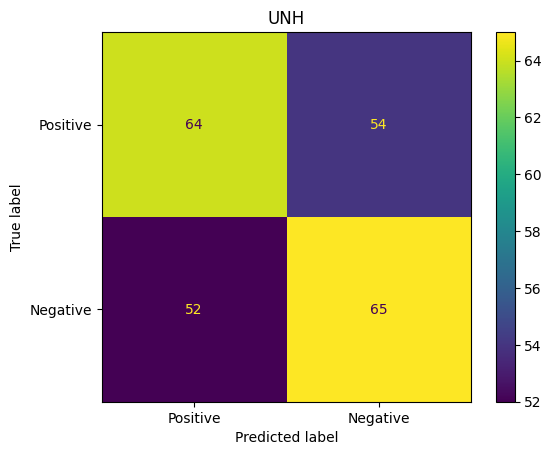

root mean squared error UNH:  0.021313971089442076
accuracy rate UNH:  0.548936170212766


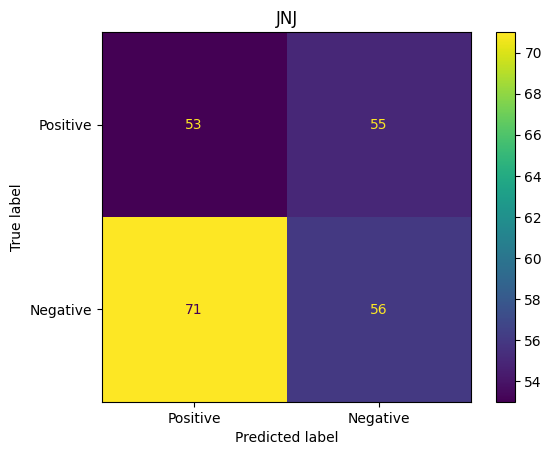

root mean squared error JNJ:  0.016125828571090232
accuracy rate JNJ:  0.46382978723404256


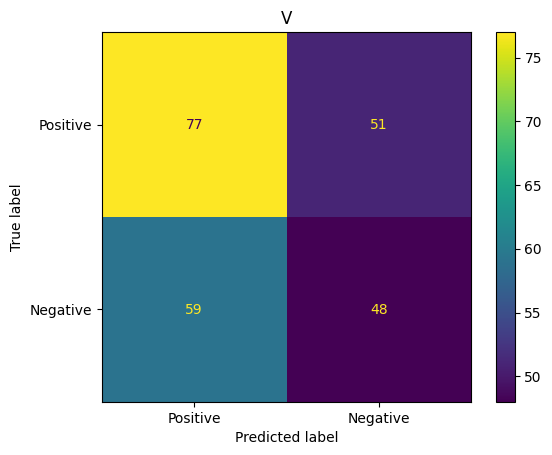

root mean squared error V:  0.02043241509091394
accuracy rate V:  0.5319148936170213


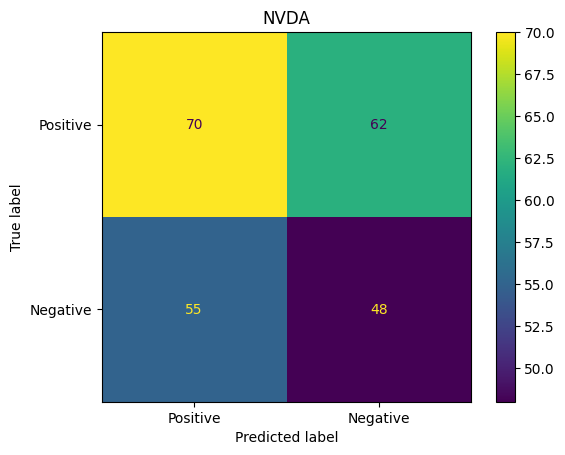

root mean squared error NVDA:  0.04534094860006128
accuracy rate NVDA:  0.502127659574468


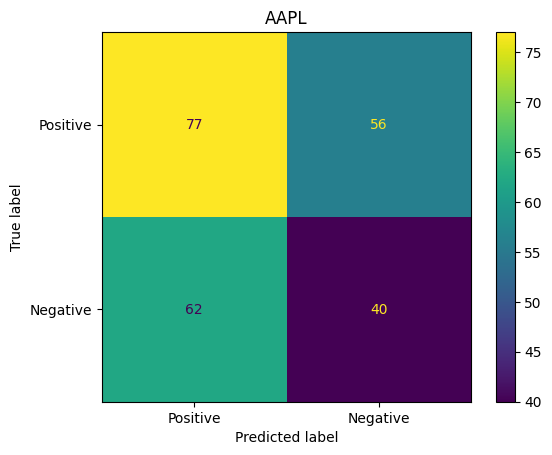

root mean squared error AAPL:  0.026080311358642215
accuracy rate AAPL:  0.4978723404255319


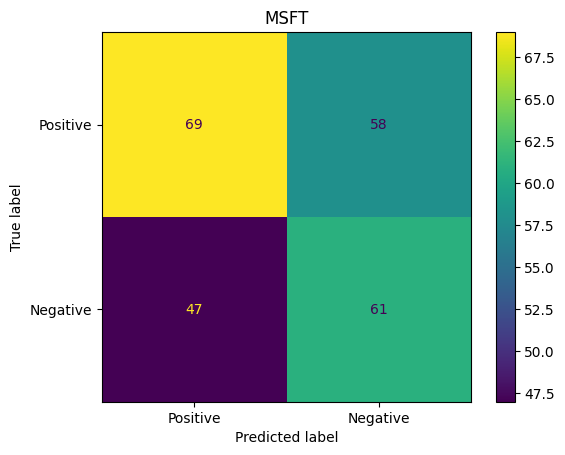

root mean squared error MSFT:  0.0231497785111755
accuracy rate MSFT:  0.5531914893617021


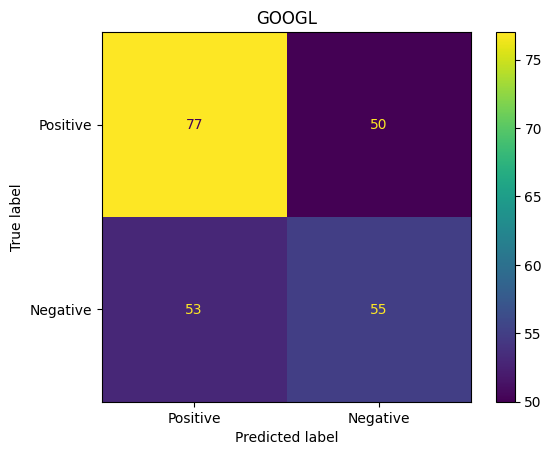

root mean squared error GOOGL:  0.026678368263850023
accuracy rate GOOGL:  0.5617021276595745


In [ ]:
for stock1 in tickers_pull:
    cm1 = confusion_matrix(true_classes[stock1], pred_classes[stock1], labels=class_labels)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)
    disp1.plot()
    plt.title(stock1)
    plt.show()
    accuracy_score_1 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=False)
    accuracy_score_2 = accuracy_score(true_classes[stock1], pred_classes[stock1], normalize=True)
    rmse = mean_squared_error(testing_prices_y[stock1], model_preds[stock1], squared=False)
    print("root mean squared error "+stock1+":  "+str(rmse))
    print("accuracy rate "+stock1+":  "+str(accuracy_score_2))

In [ ]:
# ----- ONE DAY PREDICTION:: LIVE  ------------
# training_prices_x = {}
# training_prices_y = {}
live_prices_x = {}
live_prices_y = {}
live_pred_x = {}
pred_live_30 = df.tail(noofdays_lag_live)

# live_pred_x = {}



for col in train.columns:

    company_live = df[col].to_numpy()
    company_live_30 = pred_live_30[col].to_numpy()
    company_live_x = [company_live[i:i+15] for i in range(len(company_live)-15)]
    company_live_y = [company_live[i+1] for i in range(14,len(company_live)-1)]


    # company_live_pred_x = [company_live[i:i+30+1] for i in range(len(company_live)-30+1)]
    company_live_pred_x= [company_live_30[i:i+15] for i in range(len(company_test)-15)]
    live_prices_x[col] = company_live_x
    live_prices_y[col] = company_live_y

    live_pred_x[col] = [company_live_pred_x[0]]

# live_pred_x

In [ ]:
# ----- ONE DAY PREDICTION LIVE ------------
next_day_preds ={}
for col in train.columns:
    bst = xgb.XGBRegressor(max_depth=xg_max_depth, learning_rate=xg_learning_rate,
                           reg_lambda=xg_reg_lambda, subsample=xg_subsample, grow_policy=xg_grow_policy)
    bst = bst.fit(live_prices_x[col],live_prices_y[col])
    next_day_preds[col] = bst.predict(live_pred_x[col])

next_day_preds

{'AAPL': array([0.02369587], dtype=float32),
 'AMZN': array([0.0203197], dtype=float32),
 'GOOGL': array([0.01833684], dtype=float32),
 'HON': array([0.01586421], dtype=float32),
 'JNJ': array([-0.00134193], dtype=float32),
 'MSFT': array([0.0246463], dtype=float32),
 'NVDA': array([0.02932315], dtype=float32),
 'PEP': array([0.00476959], dtype=float32),
 'RTX': array([-0.00287101], dtype=float32),
 'UNH': array([0.00440335], dtype=float32),
 'V': array([0.01476675], dtype=float32),
 'XOM': array([0.00724809], dtype=float32)}

In [ ]:
next_day_preds_df = pd.DataFrame.from_dict(next_day_preds)
next_day_preds_df.index = ['pred']*1
next_day_preds_df

AAPL     AMZN     GOOGL       HON       JNJ      MSFT      NVDA  \
pred  0.023696  0.02032  0.018337  0.015864 -0.001342  0.024646  0.029323   

          PEP       RTX       UNH         V       XOM  
pred  0.00477 -0.002871  0.004403  0.014767  0.007248

In [ ]:
"""
===================  PLEASE CREATE YOUR Alternative ML models here ===========================

and input the daily prediction into def black_litterman_weight(next_day_preds_df, sentiment_daily): below
===============================================================================================

"""

'\n===================  PLEASE CREATE YOUR Alternative ML models here ===========================\n\nand input the daily prediction into def black_litterman_weight(next_day_preds_df, sentiment_daily): below\n===============================================================================================\n\n'

## STEP 3 News Feed and Sentiment from finBert

In [ ]:
stock_list = tickers_pull
# stock_list = ['XON']

sentiment_list =[]

# Get today's date
today = date.today()
# print("Today is: ", today)

# Yesterday date
yesterday = today - timedelta(days = 1)
# print("Yesterday was: ", yesterday)

# stock_list =  ['XOM']
# count=3
for stock in stock_list:
    # ohlc = yf.download(tickers_pull, start="2018-11-13", end="2023-11-13")
    # count = 0 ==> news_series = finnhub_client.company_news(stock, _from="2022-11-04", to="2023-10-20")
    # count = 1 ==> news_series = finnhub_client.company_news(stock, _from="2022-11-04", to="2023-09-12")
    # count = 2 ==> news_series = finnhub_client.company_news(stock, _from="2022-11-04", to="2023-07-25")
    news_series = finnhub_client.company_news(stock, _from=today, to=today)

    if news_series == []:
        print("stock news "+stock+" is empty")
        sentiment_stock  = 0
        # result_daily[stock] = np.select(conditions, sentiment_values)

    else:

        news_series_df = pd.DataFrame.from_dict(news_series)

        result_date = []
        result_news = []
        for index, row in news_series_df.iterrows():
            result_news.append(row['headline'])
            result_date.append(convert_date(row['datetime']))
        # print(result_news)
        result_date
        inputs = tokenizer(result_news, padding = True, truncation = True, return_tensors='pt')
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        # print(predictions)
        pred_arr = predictions.detach().cpu().numpy()
        result_date_df = pd.DataFrame({'date' : result_date}, columns=['date'])
        # result_date_df
        result_news_df = pd.DataFrame(data = pred_arr,
                                      columns = ["Positive", "Negative", "Neutral"])
        # result_news_df
        result_combined = pd.concat([result_date_df, result_news_df], axis=1)
        # result_daily = result_combined.groupby('date')['Positive', 'Negative', 'Neutral'].mean()
        # for daily use this
        result_daily = result_combined.mean()
        conditions = [
        (result_daily['Positive'] > result_daily['Negative']) & (result_daily['Positive'] > result_daily['Neutral']),
        (result_daily['Negative'] > result_daily['Positive']) & (result_daily['Negative'] > result_daily['Neutral']),
        (result_daily['Neutral'] > result_daily['Positive']) & (result_daily['Neutral'] > result_daily['Positive'])
        ]
        sentiment_values = [1, -1, 0]

        result_daily[stock] = np.select(conditions, sentiment_values)

        sentiment_stock  = np.ndarray.item(np.array([result_daily[stock]]))

    sentiment_list.append(sentiment_stock)

sentiment_list_row =[sentiment_list]
sentiment_daily = pd.DataFrame(sentiment_list_row, columns=stock_list, index=['sentiment']*1)

# sentiment_daily = pd.DataFrame(sentiment_list, columns=stock_list, index=[yesterday])
        # drop

    # result_daily.to_csv('C:/Users/Ed/EECS6893_BigDataAnalytics_FALL_2023/Fall_2023/proj2023_datasave/csv_20231114PM0515/sentiment_set'+str(count)+'_'+stock+'.csv', encoding='utf-8', index=True)



    # result_daily

stock news HON is empty
stock news RTX is empty
stock news PEP is empty
stock news UNH is empty


In [ ]:


def categorise(row):
    if row['pred'] > 0 and row['sentiment'] ==1:
        return 1
    elif row['pred'] < 0 and row['sentiment'] ==-1:
        return 1
    elif row['pred'] > 0 and row['sentiment'] ==-1:
        return 0
    elif row['pred'] < 0 and row['sentiment'] ==1:
        return 0

    return 0.5




## STEP 4  Black Litterman Model Using ML predictions as View and sentiment analysis as Confidence

In [ ]:
# tickers_pull= ['HON', 'PEP', 'RTX', 'UNH', 'XOM']
mcaps = {'XOM': 433609605120,
 'HON': 138127982592,
 'RTX': 143133261824,
 'AMZN': 1337545719808,
 'PEP': 255175737344,
 'UNH': 447491244032,
 'JNJ': 430141800448,
 'V': 497378099200,
 'NVDA': 1044859453440,
 'AAPL': 3050896097280,
 'MSFT': 2532081664000,
 'GOOGL': 1524283736064}

In [ ]:
def black_litterman_weight(next_day_preds_df, sentiment_daily):


    # next_day_preds_df = next_day_preds_df.reset_index()
    next_day_preds_df_T = next_day_preds_df.T
    # next_day_preds_df_T
    sentiment_daily_T = sentiment_daily.T
    # sentiment_daily_T
    combine_pred_sentiment = next_day_preds_df_T.join(sentiment_daily_T)
    # combine_pred_sentiment


    combine_pred_sentiment['confidence'] = combine_pred_sentiment.apply(lambda row: categorise(row), axis=1)
    confidence = combine_pred_sentiment['confidence'].T
    # confidence


    # prices_BL = prices_BL_raw.head(1115+x)
    prices_BL =  prices
    # market_prices_BL = market_prices_BL_raw.head(1115+x)
    market_prices_BL = market_prices_BL_raw
    viewdict_ML2_GBReg = next_day_preds
    confidences_ML2_GBReg = confidence

    S_BL = risk_models.CovarianceShrinkage(prices_BL).ledoit_wolf()
    delta = black_litterman.market_implied_risk_aversion(market_prices_BL)
    # delta
    market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S_BL)
    # market_prior

    bl_ML2_GBReg = BlackLittermanModel(S_BL, pi=market_prior, absolute_views=viewdict_ML2_GBReg, omega="idzorek",
       view_confidences=confidences_ML2_GBReg)
    bl = bl_ML2_GBReg

    omega_ML2_GBReg = bl.omega
    # We are using the shortcut to automatically compute market-implied prior
    bl_ML2_GBReg = BlackLittermanModel(S_BL, pi="market", market_caps=mcaps, risk_aversion=delta,
    absolute_views=viewdict_ML2_GBReg, omega=omega_ML2_GBReg)
    # Posterior estimate of returns
    ret_bl_ML2_GBReg = bl.bl_returns()
    # ret_bl_ML2_GBReg
    rets_df_ML2_GBReg = pd.DataFrame([market_prior, ret_bl_ML2_GBReg, pd.Series(viewdict_ML2_GBReg)],
     index=["Prior", "Posterior", "Views"]).T
    # rets_df_ML2_GBReg
    # rets_df_ML2_GBReg.plot.bar(figsize=(12,8));

    S_bl_ML2_GBReg = bl_ML2_GBReg.bl_cov()
    # plotting.plot_covariance(S_bl_ML2_GBReg);
    ef = EfficientFrontier(ret_bl_ML2_GBReg, S_bl_ML2_GBReg)
    ef.add_objective(objective_functions.L2_reg)
    ef.max_sharpe()
    weights_ML2_GBReg = ef.clean_weights()
    # weights_ML2_GBReg
    weights_ML2_GBReg_df = pd.DataFrame(weights_ML2_GBReg, index=[today])
    # weights_ML2_GBReg_df_out = weights_ML2_GBReg_df_out.append(weights_ML2_GBReg_df)

    return weights_ML2_GBReg_df


In [ ]:
weights_daily_bl =  black_litterman_weight(next_day_preds_df, sentiment_daily)
weights_daily_bl

AAPL  AMZN    GOOGL  HON  JNJ    MSFT     NVDA  PEP  RTX  UNH  \
2023-12-03   0.0   0.0  0.22012  0.0  0.0  0.2671  0.50682  0.0  0.0  0.0   

                  V  XOM  
2023-12-03  0.00596  0.0

In [ ]:
# Requirement already satisfied:
# pip install tensorflow pandas numpy matplotlib

In [ ]:
# train_df = pd.read_csv('/content/five_stocks_return_training_set.csv')
# test_df = pd.read_csv('/content/five_stocks_return_test_set.csv')

In [ ]:
# train_df.drop(columns=["Unnamed: 0", "Date"], inplace=True)
# train_df.head(10)

train_df = train
test_df = test

In [ ]:
training_prices_x = {}
training_prices_y = {}
testing_prices_x = {}
testing_prices_y = {}
for col in train_df.columns:
    company_train = train_df[col].to_numpy()
    company_test = test_df[col].to_numpy()
    print(company_train[-1])
    print(company_test[-1])
    # Training input values are segments of prices 30 days long
    company_x = [company_train[i:i+30] for i in range(len(company_train)-44)]
    print(len(company_x))
    # Training output - stock price 15th day into the future
    company_y = [company_train[i+15] for i in range(29,len(company_train)-15)]
    print(len(company_y))
    # Testing input x - segments of prices 30 days long
    company_test_x = [company_test[i:i+30] for i in range(len(company_test)-44)]
    company_test_y = [company_test[i+15] for i in range(29,len(company_test)-15)]
    print(len(company_test_x))
    print(len(company_test_y))
    training_prices_x[col] = company_x
    training_prices_y[col] = company_y
    testing_prices_x[col] = company_test_x
    testing_prices_y[col] = company_test_y

-0.003371331248555487
0.006791305952341675
963
963
206
206
-0.01434557849824114
0.006434406632690459
963
963
206
206
-0.005446038558246102
-0.005055445371738521
963
963
206
206
0.0077739673892534
0.009493674090113258
963
963
206
206
0.000783276221457907
0.024052768218151055
963
963
206
206
0.0012957047662014443
-0.01161223998827976
963
963
206
206
-0.01511527223489173
-0.00010694528381738344
963
963
206
206
-0.0011294286759373495
0.0023769039825993765
963
963
206
206
0.015175892446126715
0.01030923298089359
963
963
206
206
0.0016813736878398267
-0.010506895250037007
963
963
206
206
0.0030415468754296793
-0.0008959812814102186
963
963
206
206
-0.008483754898239826
0.002433326895056931
963
963
206
206


In [ ]:
training_prices_x['HON'][-1]

array([-0.0182278 ,  0.03635376,  0.02976193, -0.00213256, -0.01557848,
       -0.02073812,  0.00280033,  0.01006464, -0.0047807 ,  0.02754801,
       -0.01909329,  0.01653668,  0.01604158, -0.00333559, -0.00914773,
        0.02910373,  0.022373  ,  0.01471365,  0.00326928,  0.03269047,
        0.04295359, -0.00444039, -0.00450935, -0.01294926,  0.01955403,
        0.01692837,  0.00923752,  0.00757971, -0.00808251,  0.02957377])

In [ ]:

training_prices_y['HON'][-1]

0.0077739673892534

In [ ]:
model_preds ={}
for col in train_df.columns:
    bst = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=0)
    bst = bst.fit(training_prices_x[col],training_prices_y[col])
    model_preds[col] = bst.predict(testing_prices_x[col])

In [ ]:
model_preds['HON'][-1]

0.0015370225288370725

In [ ]:
true_classes = {}
pred_classes = {}
for col in train_df.columns:
    true = testing_prices_y[col]
    pred = model_preds[col]
    true_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", true))
    pred_classes[col] = list(map(lambda x: "Positive" if x > 0 else "Negative", pred))

In [ ]:
class_labels=['Positive', 'Negative']

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

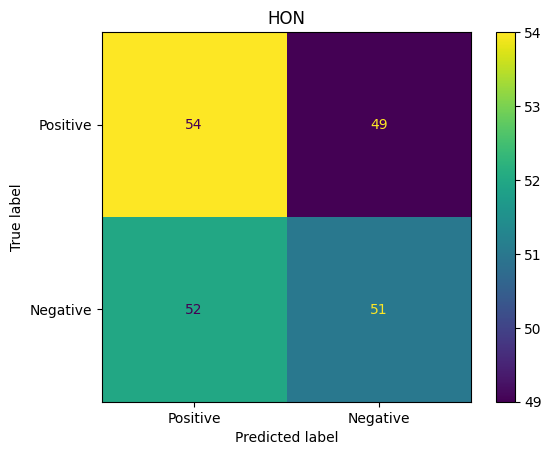

In [ ]:
stock1 = 'HON'
cm1 = confusion_matrix(true_classes[stock1], pred_classes[stock1], labels=class_labels)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels)
disp1.plot()
plt.title(stock1)
plt.show()

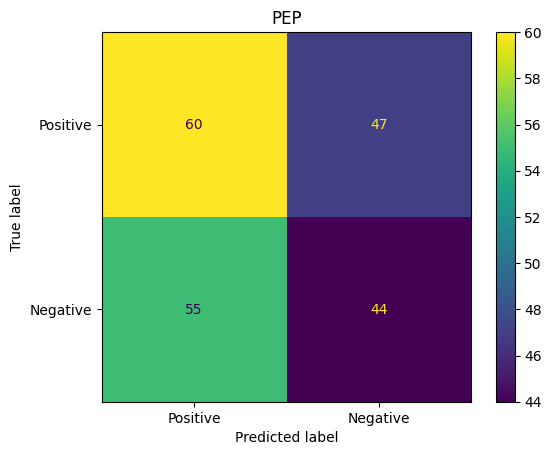

In [ ]:
stock2 = 'PEP'
cm2 = confusion_matrix(true_classes[stock2], pred_classes[stock2], labels=class_labels)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_labels)
disp2.plot()
plt.title(stock2)
plt.show()

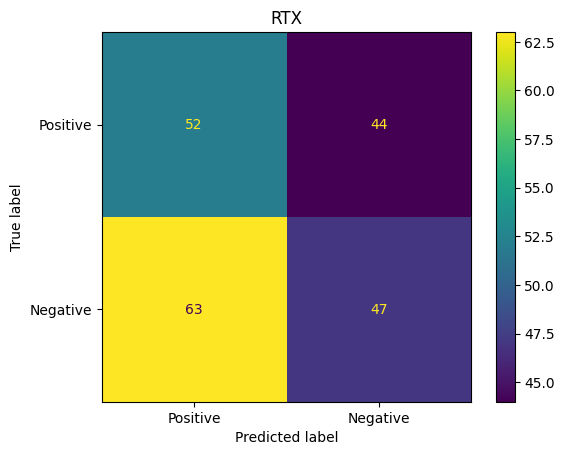

In [ ]:
stock3 = 'RTX'
cm3 = confusion_matrix(true_classes[stock3], pred_classes[stock3], labels=class_labels)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=class_labels)
disp3.plot()
plt.title(stock3)
plt.show()

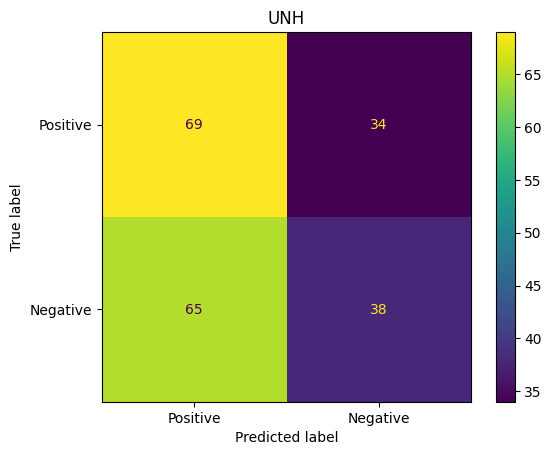

In [ ]:
stock4 = 'UNH'
cm4 = confusion_matrix(true_classes[stock4], pred_classes[stock4], labels=class_labels)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=class_labels)
disp4.plot()
plt.title(stock4)
plt.show()

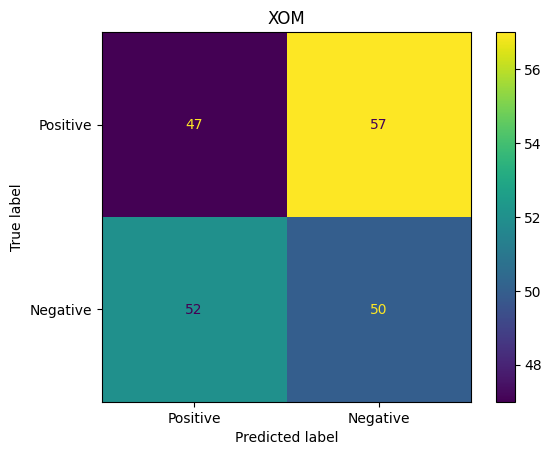

In [ ]:
stock5 = 'XOM'
cm5 = confusion_matrix(true_classes[stock5], pred_classes[stock5], labels=class_labels)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=class_labels)
disp5.plot()
plt.title(stock5)
plt.show()

In [ ]:
accs = {}
for col in train_df.columns:
    true = testing_prices_y[col]
    pred = model_preds[col]
    accs[col] = mean_squared_error(true, pred)

In [ ]:
for col in accs:
    print(col+" mean-squared error: " + str(accs[col]))

AAPL mean-squared error: 0.00015853106044538432
AMZN mean-squared error: 0.0004517435867139944
GOOGL mean-squared error: 0.0003555629682886165
HON mean-squared error: 0.00012509265194134522
JNJ mean-squared error: 0.00011902628633814214
MSFT mean-squared error: 0.0002533459922742703
NVDA mean-squared error: 0.0009712399403693167
PEP mean-squared error: 9.095538586201218e-05
RTX mean-squared error: 0.00026826491855457105
UNH mean-squared error: 0.00019877909061613724
V mean-squared error: 9.971468312769684e-05
XOM mean-squared error: 0.00026499484733360357


In [ ]:
# Load and prepare data (replace with your data)
data = pd.DataFrame({'Close': np.random.rand(1000) * 100})
data

Close
0    61.807224
1     1.948715
2    99.819534
3    57.469952
4    95.119440
..         ...
995  65.724801
996  54.045171
997  82.367767
998  11.457489
999  23.636201

[1000 rows x 1 columns]

In [ ]:
data.drop(columns=["Unnamed: 0", "Date", "PEP", "RTX", "UNH", "XOM"], inplace=True)
data.head(10)

KeyError: ignored

In [ ]:
# Calculate daily return
data['Return'] = data['Close'].pct_change()

In [ ]:
          # Define categories: 1 for Increase, 0 for Decrease
threshold = 0.01  # Define threshold for 'Increase'
data['Category'] = np.where(data['Return'] > threshold, 1, 0)

In [ ]:
# Drop NaN values
data.dropna(inplace=True)

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
data['Normalized_Return'] = scaler.fit_transform(data['Return'].values.reshape(-1,1))

In [ ]:
# Create sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 20
X, y = create_dataset(data[['Normalized_Return']], data['Category'], time_steps)


In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=30, validation_split=0.2, verbose=1)


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(conf_matrix)
